In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **Data Loading and Inspection:**

In [2]:
data = pd.read_csv(r"C:\Users\Naina Singam\OneDrive\Desktop\Data Science\Python Projects\insurance_with_missingvalues2.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,NaN,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1335,50.0,male,30.970,3.0,no,northwest,10600.54830
1336,18.0,female,31.920,0.0,no,northeast,2205.98080
1337,18.0,female,36.850,0.0,no,southeast,1629.83350
1338,21.0,female,25.800,0.0,no,southwest,2007.94500


In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,NaN,no,northwest,3866.85520


In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1335,50.0,male,30.97,3.0,no,northwest,10600.5483
1336,18.0,female,31.92,0.0,no,northeast,2205.9808
1337,18.0,female,36.85,0.0,no,southeast,1629.8335
1338,21.0,female,25.80,0.0,no,southwest,2007.9450
1339,61.0,female,29.07,0.0,yes,northwest,29141.3603


In [7]:
data.shape

(1340, 7)

In [8]:
data.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1330 non-null   float64
 4   smoker    1335 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1312 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.4+ KB


In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Data Cleaning:

In [11]:
data_original = data.copy()

### Handling Duplicate Data

In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1335    False
1336    False
1337    False
1338    False
1339    False
Length: 1340, dtype: bool

In [13]:
data.duplicated().sum()

3

In [14]:
# dropping the duplicate row - only 3 row
data = data.drop_duplicates()

In [15]:
data.duplicated().sum()

0

#### 3 duplicate rows detected and dropped

### Handling Missing Values:

In [16]:
data.isnull().sum()

age          2
sex          7
bmi          9
children    10
smoker       5
region       3
charges     28
dtype: int64

In [17]:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss(df):
  df1=df[df.columns[df.isnull().sum()>=1]]# I get a subset of data that contain columns that have at least one missing values
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = (df1.isnull().sum()/df.shape[0]).sort_values(ascending=False)
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [18]:
percentage_of_miss(data)

,Number of Missing,Percentage
charges,28,0.020942
children,10,0.007479
bmi,9,0.006731
sex,7,0.005236
smoker,5,0.003740
region,3,0.002244
age,2,0.001496


In [19]:
data.shape

(1337, 7)

In [20]:
data.astype('object').describe().T

,count,unique,top,freq
age,1335.0,47.0,18.0,69.0
sex,1330,2,male,672
bmi,1328.0,546.0,32.3,13.0
children,1327.0,6.0,0.0,569.0
smoker,1332,2,no,1059
region,1334,4,southeast,363
charges,1309.0,1308.0,1639.5631,2.0


In [21]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1335.0,NaN,NaN,NaN,39.214981,14.057584,18.0,26.5,39.0,51.0,64.0
sex,1330,2,male,672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1328.0,NaN,NaN,NaN,30.656167,6.092806,15.96,26.2725,30.3325,34.7,53.13
children,1327.0,NaN,NaN,NaN,1.09269,1.203815,0.0,0.0,1.0,2.0,5.0
smoker,1332,2,no,1059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1334,4,southeast,363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1309.0,NaN,NaN,NaN,13348.504957,12204.228771,1121.8739,4719.73655,9304.7019,16796.41194,63770.42801


## Imputing missing values in each column:

#### **1. AGE: has 2 missing values; replacing with mode (mean and mode are arounf 30.0)**

In [22]:
data['age'].median()

39.0

In [23]:
data['age'] = data['age'].fillna(data['age'].median())

In [24]:
percentage_of_miss(data)

,Number of Missing,Percentage
charges,28,0.020942
children,10,0.007479
bmi,9,0.006731
sex,7,0.005236
smoker,5,0.003740
region,3,0.002244


#### **2. Sex: has 7 missing values; replacing with mode**

In [25]:
data['sex'].value_counts()

sex
male      672
female    658
Name: count, dtype: int64

In [26]:
data['sex'].mode()

0    male
Name: sex, dtype: object

#### imputing with mode = male

In [27]:
data['sex'] = data['sex'].fillna('male')

In [28]:
percentage_of_miss(data)

,Number of Missing,Percentage
charges,28,0.020942
children,10,0.007479
bmi,9,0.006731
smoker,5,0.003740
region,3,0.002244


#### **3. BMI: has 9 missing values; **

In [29]:
data['bmi'].nunique()

546

In [30]:
data['bmi'].agg(['min','mean','median','std','max'])

min       15.960000
mean      30.656167
median    30.332500
std        6.092806
max       53.130000
Name: bmi, dtype: float64

#### min is 15, max is 53, mean is 30.65, median is 30.33 ; data is close to normally distributed, imputing missing values with median

In [31]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())

#### **4. CHILDREN : has 10 missing values**

In [32]:
data['children'].value_counts()

children
0.0    569
1.0    324
2.0    236
3.0    156
4.0     24
5.0     18
Name: count, dtype: int64

In [33]:
data['children'].agg(['min','mean','median','std','max'])

min       0.000000
mean      1.092690
median    1.000000
std       1.203815
max       5.000000
Name: children, dtype: float64

#### replacing the missing values with median = 1

In [34]:
data['children'].median()

1.0

In [35]:
data['children']=data['children'].fillna(data['children'].median())

In [36]:
percentage_of_miss(data)

,Number of Missing,Percentage
charges,28,0.020942
smoker,5,0.003740
region,3,0.002244


#### level 4,5 have 24, 18 respectivly. Which level less when compaired to other level. So, replacing the level 3, 4, 5 to 3+ as the

In [37]:
data['children'] = data['children'].map({0:'0.0',1:'1.0',2:'2.0',3:'3.0+',4:'3.0+',5:'3.0+'})

In [38]:
data['children'].value_counts()

children
0.0     569
1.0     334
2.0     236
3.0+    198
Name: count, dtype: int64

#### **5. SMOKER: has 5 missing values; replacing the missing values with mode**

In [39]:
data['smoker'].value_counts()

smoker
no     1059
yes     273
Name: count, dtype: int64

the data is imbalanced

In [40]:
data['smoker'].mode()

0    no
Name: smoker, dtype: object

#### replace the missing values with mode = no

In [41]:
data['smoker']= data['smoker'].fillna('no')

In [42]:
percentage_of_miss(data)

,Number of Missing,Percentage
charges,28,0.020942
region,3,0.002244


#### **6. REGION: has 3 missing values, replacing with mode**

In [43]:
data['region'].value_counts()

region
southeast    363
northwest    325
southwest    324
northeast    322
Name: count, dtype: int64

data looks balanced

In [44]:
data['region'].mode()

0    southeast
Name: region, dtype: object

#### replacing missing values with mode = southeast

In [45]:
data['region'] = data['region'].fillna('southeast')

In [46]:
percentage_of_miss(data)


,Number of Missing,Percentage
charges,28,0.020942


#### **7.CHARGES: has 28 missing values; imputing with mean/median**

In [47]:
data['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
2221.56445     1
13063.88300    1
13555.00490    1
              ..
26109.32905    1
28287.89766    1
1149.39590     1
37079.37200    1
29141.36030    1
Name: count, Length: 1308, dtype: int64

data['charges'] has 1308 unique values

In [48]:
data['charges'].agg(['min','mean','median','std','max'])

min        1121.873900
mean      13348.504957
median     9304.701900
std       12204.228771
max       63770.428010
Name: charges, dtype: float64

In [49]:
data['charges'].quantile([0.50,0.75,0.95,0.99,1.0])

0.50     9304.701900
0.75    16796.411940
0.95    41670.289460
0.99    48546.649134
1.00    63770.428010
Name: charges, dtype: float64

There is big difference between 99percentile - 48546 and max - 63770. 
Mean - 13348
Median - 9304
Imputing with mean.

In [50]:
data['charges'] = data['charges'].fillna(data['charges'].mean())

In [51]:
percentage_of_miss(data)

,Number of Missing,Percentage


### Duplicate rows, Missing values haven ben imputed sucessfully

# Univariant and Bivariant Analysis

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   object 
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(3), object(4)
memory usage: 83.6+ KB


In [175]:
data.shape

(1337, 7)

In [53]:
data_columns=data.columns
data_columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [54]:
for i in data.columns:
    print (i )
    print(data[i].value_counts())
    print(50*'_')
    

age
age
18.0    69
19.0    68
52.0    29
50.0    29
51.0    29
47.0    29
46.0    29
45.0    29
48.0    29
20.0    29
26.0    28
22.0    28
21.0    28
53.0    28
24.0    28
27.0    28
23.0    28
25.0    28
54.0    28
43.0    27
41.0    27
40.0    27
29.0    27
42.0    27
44.0    27
49.0    27
28.0    27
39.0    27
31.0    27
57.0    26
55.0    26
33.0    26
32.0    26
34.0    26
30.0    26
56.0    26
38.0    25
37.0    25
35.0    25
36.0    25
58.0    25
59.0    25
62.0    23
60.0    23
63.0    23
61.0    23
64.0    22
Name: count, dtype: int64
__________________________________________________
sex
sex
male      679
female    658
Name: count, dtype: int64
__________________________________________________
bmi
bmi
32.3000    13
30.3325     9
28.3100     9
31.3500     8
30.4950     8
           ..
46.7000     1
46.2000     1
44.7700     1
32.1200     1
30.9700     1
Name: count, Length: 547, dtype: int64
__________________________________________________
children
children
0.0     569
1.0

#### Univariate for categorical variables:

In [55]:
df_cat=data.select_dtypes(include='object')
df_cat.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [56]:
pd.options.display.float_format = '{:.2f}'.format
df_cat.describe(include='all').T

,count,unique,top,freq
sex,1337,2,male,679
children,1337,4,0.0,569
smoker,1337,2,no,1064
region,1337,4,southeast,366


In [57]:
import researchpy as rp

In [58]:
rp.summary_cat(df_cat)

,Variable,Outcome,Count,Percent
0,sex,male,679,50.79
1,,female,658,49.21
2,children,0.0,569,42.56
3,,1.0,334,24.98
4,,2.0,236,17.65
5,,3.0+,198,14.81
6,smoker,no,1064,79.58
7,,yes,273,20.42
8,region,southeast,366,27.37
9,,northwest,325,24.31


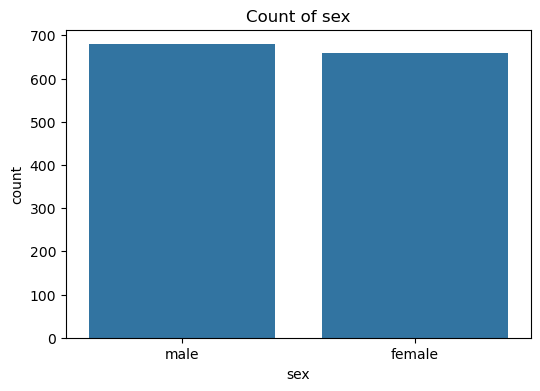

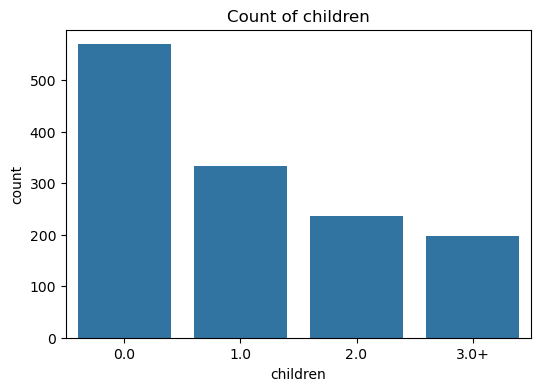

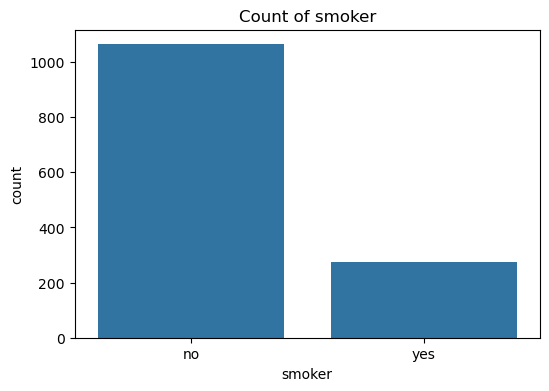

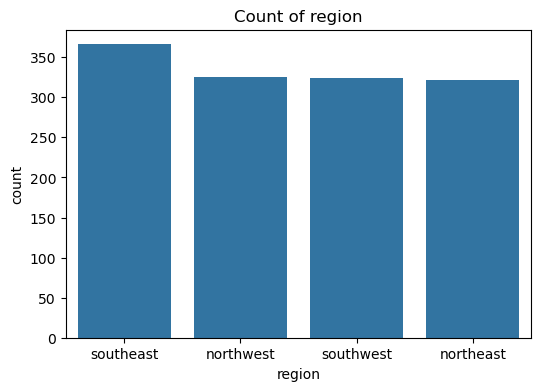

In [59]:
for col in df_cat.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(df_cat[col].value_counts())
    plt.title(f'Count of {col}')
    plt.show()

## Inferance of each Categorical variable:
- **SEX:** 2 groups, balanced data
- **Childrens:** 4 groups(0,1,2,3+), imbalance data
- **Smokers:** 2 groups, imbalanced data
- **Region:** 4 groups, almost balanced data 

#### Univariate for numarical variables:

In [60]:
df_num=data.select_dtypes(exclude='object')
df_num.columns

Index(['age', 'bmi', 'charges'], dtype='object')

In [61]:
pd.options.display.float_format = '{:.2f}'.format
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.00,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1337.00,30.65,6.07,15.96,26.32,30.33,34.60,53.13
charges,1337.00,13348.50,12075.66,1121.87,4766.02,9549.57,16420.49,63770.43


In [62]:
rp.summary_cont(df_num)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,1337.00,39.21,14.05,0.38,38.46,39.97
1,bmi,1337.00,30.65,6.07,0.17,30.33,30.98
2,charges,1337.00,13348.50,12075.66,330.25,12700.64,13996.37


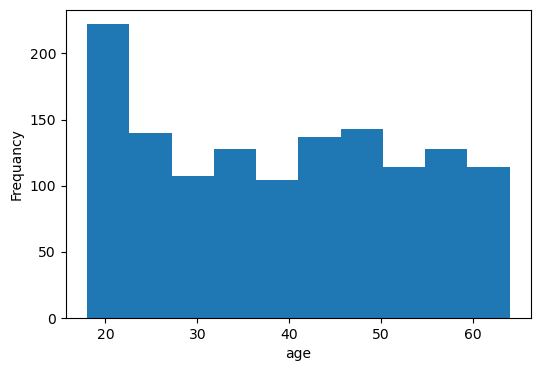

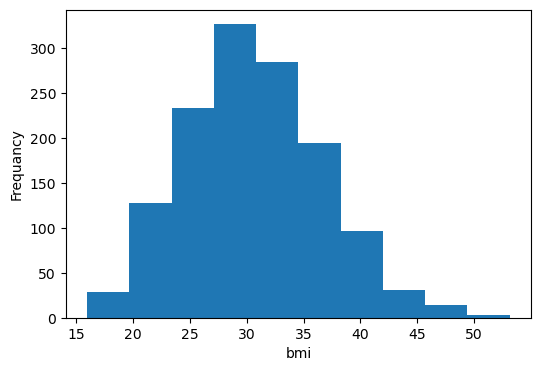

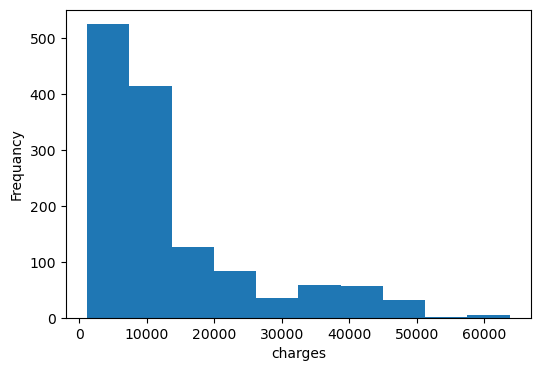

In [63]:
for col in df_num.columns:
    plt.figure(figsize=(6,4))
    plt.hist(df_num[col])
    plt.xlabel(col)
    plt.ylabel('Frequancy')
    plt.show()

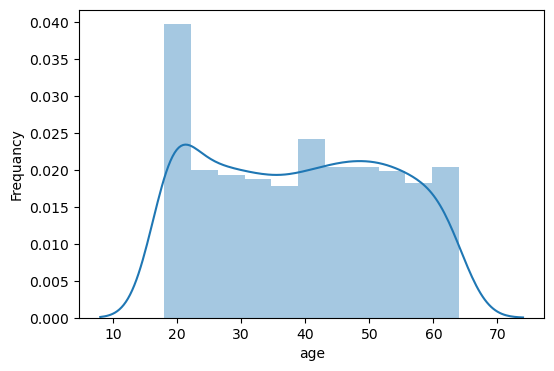

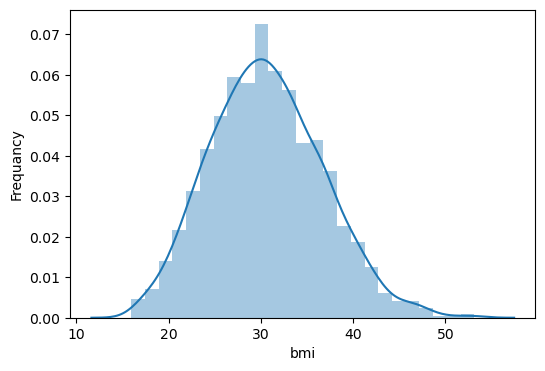

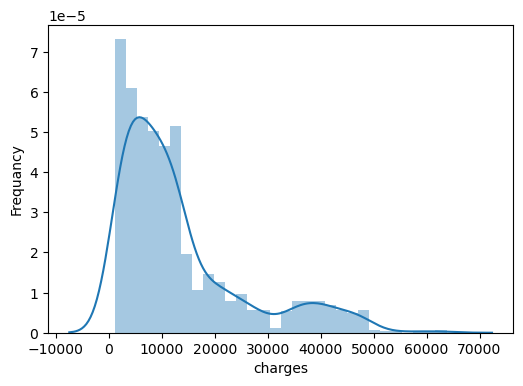

In [64]:
for col in df_num.columns:
    plt.figure(figsize=(6,4))
    sns.distplot(df_num[col])
    plt.xlabel(col)
    plt.ylabel('Frequancy')
    plt.show()

# Handling Outliers:

In [65]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.00,female,27.90,0.0,yes,southwest,16884.92
1,18.00,male,33.77,1.0,no,southeast,1725.55
2,28.00,male,33.00,3.0+,no,southeast,4449.46
3,33.00,male,22.70,0.0,no,northwest,21984.47
4,32.00,male,28.88,1.0,no,northwest,3866.86


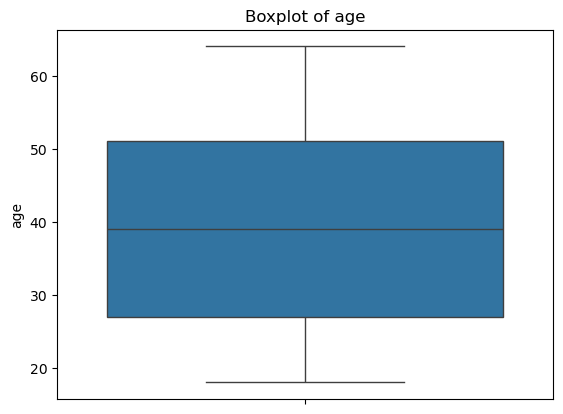

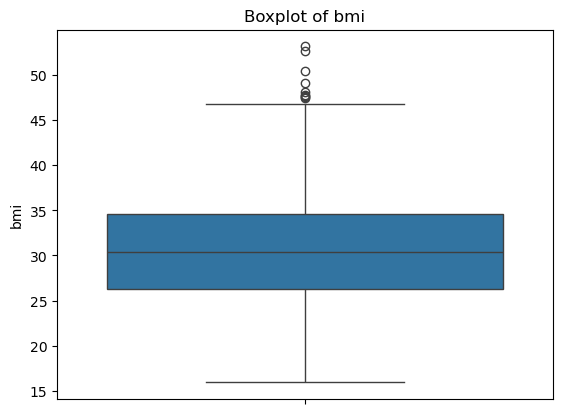

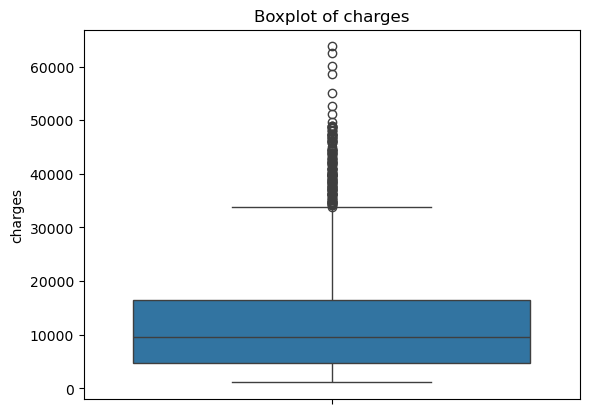

In [66]:
for col in df_num.columns:
    sns.boxplot(df_num[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [67]:
data.age.quantile([0.25,0.50,0.75,0.95,0.99])

0.25   27.00
0.50   39.00
0.75   51.00
0.95   62.00
0.99   64.00
Name: age, dtype: float64

There is **no** huge difference between the quantile of 95th and 99th.

In [68]:
data.bmi.quantile([0.25,0.50,0.75,0.95,0.99])

0.25   26.32
0.50   30.33
0.75   34.60
0.95   40.98
0.99   46.41
Name: bmi, dtype: float64

There is **huge** difference between the quantile of 95th and 99th of 4

In [69]:
data.charges.quantile([0.25,0.50,0.75,0.95,0.99])

0.25    4766.02
0.50    9549.57
0.75   16420.49
0.95   41210.05
0.99   48537.80
Name: charges, dtype: float64

There is **huge** difference between the quantile of 95th and 99th of 4

In [70]:
def outlier_detection(col):
    i=0 
    j=0
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    UOF1=Q3+3*(IQR)
    LOF1=Q1-3*(IQR)
    Clean_col=[] 
    for val in data[col]:
        if val<LOF1:   
            Clean_col.append(LOF1)
            i+=1
        elif val>UOF1 : 
            Clean_col.append(UOF1)
            j+=1
        else : Clean_col.append(val)
    data[col]=Clean_col 
    sns.distplot(data[col])
    print(f'Number of outliers that they are less than lower outer fence({LOF1}): ',i,f'\nNumber of outliers that they are bigger than upper outer fence ({UOF1}) : ',j)
    return data[col] .describe()


Number of outliers that they are less than lower outer fence(-45.0):  0 
Number of outliers that they are bigger than upper outer fence (123.0) :  0


count   1337.00
mean      39.21
std       14.05
min       18.00
25%       27.00
50%       39.00
75%       51.00
max       64.00
Name: age, dtype: float64

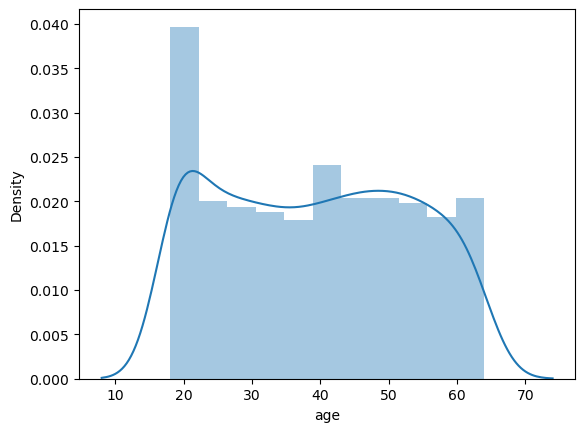

In [71]:
outlier_detection('age')

**NOTE: NO OUTLIERS IN AGE COLUMN**

Number of outliers that they are less than lower outer fence(1.4600000000000009):  0 
Number of outliers that they are bigger than upper outer fence (59.455) :  0


count   1337.00
mean      30.65
std        6.07
min       15.96
25%       26.32
50%       30.33
75%       34.60
max       53.13
Name: bmi, dtype: float64

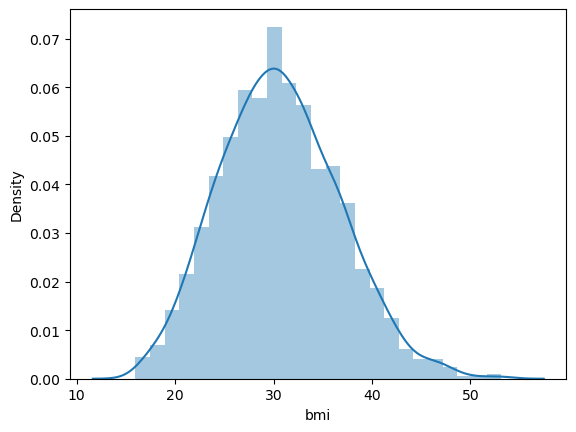

In [72]:
outlier_detection('bmi')

Number of outliers that they are less than lower outer fence(-30197.395649999995):  0 
Number of outliers that they are bigger than upper outer fence (51383.91219999999) :  6


count    1337.00
mean    13315.31
std     11957.37
min      1121.87
25%      4766.02
50%      9549.57
75%     16420.49
max     51383.91
Name: charges, dtype: float64

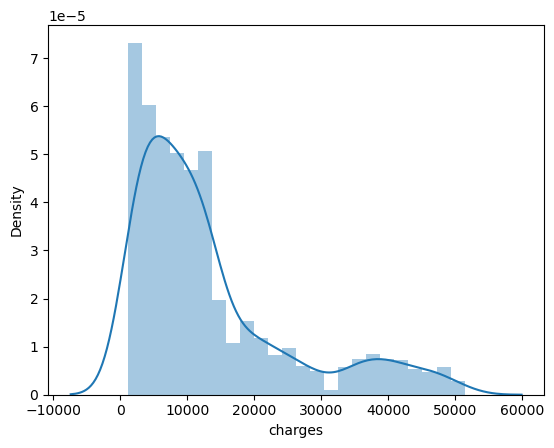

In [73]:
outlier_detection('charges')

### Transforming charges to handle outliers

In [74]:
data['charges'] = np.sqrt(data['charges'])

Number of outliers that they are less than lower outer fence(-108.28190576762093):  0 
Number of outliers that they are bigger than upper outer fence (305.4607650201052) :  0


count   1337.00
mean     105.22
std       47.40
min       33.49
25%       69.04
50%       97.72
75%      128.14
max      226.68
Name: charges, dtype: float64

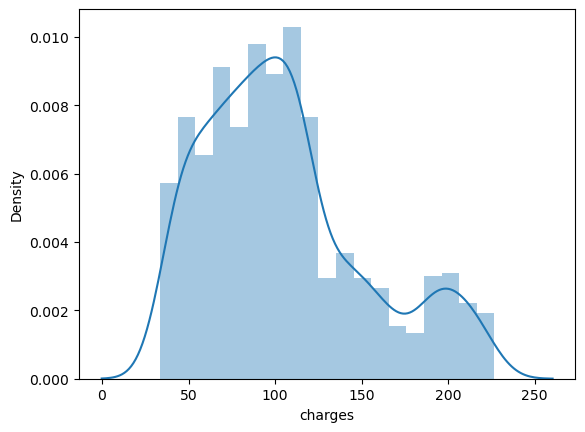

In [75]:
outlier_detection('charges')

# Bivariate Analyssis :

### Continous vs Continous:

In [81]:
df_num.corr()

,age,bmi,charges
age,1.00,0.11,0.30
bmi,0.11,1.00,0.20
charges,0.30,0.20,1.00


<Axes: >

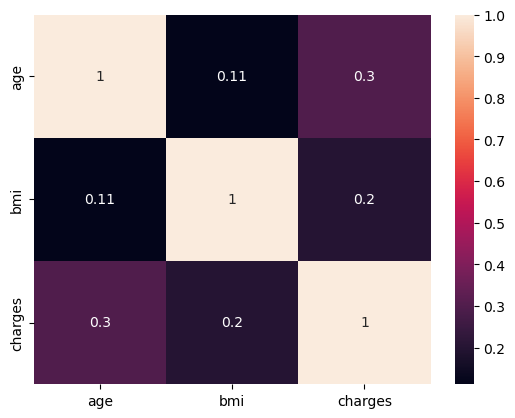

In [82]:
sns.heatmap(df_num.corr(), annot=True)

### There seems no high correlinarity between variables

## Multicoliniarity : 

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [84]:
calculate_vif(df_num)

,Feature,VIF
0,age,8.06
1,bmi,7.73
2,charges,2.49


## as VIF for all colums is <10 there is no Multicolliniarity 

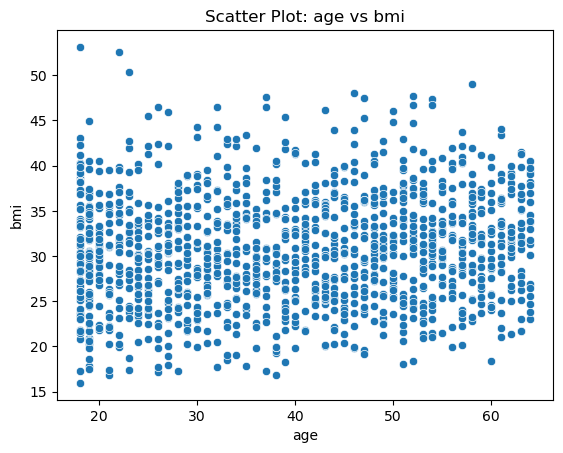

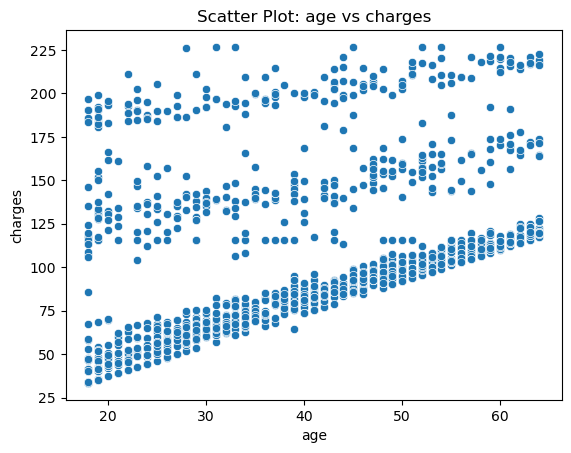

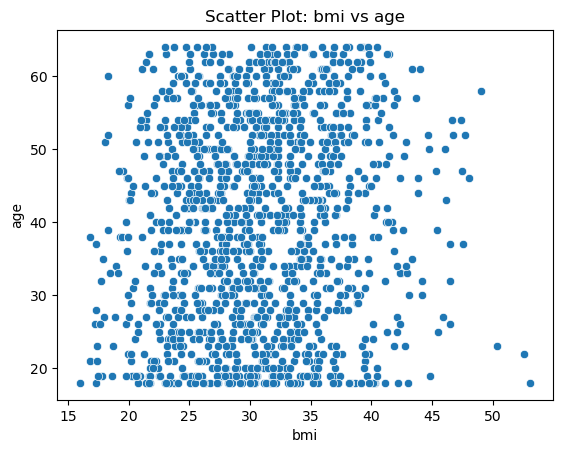

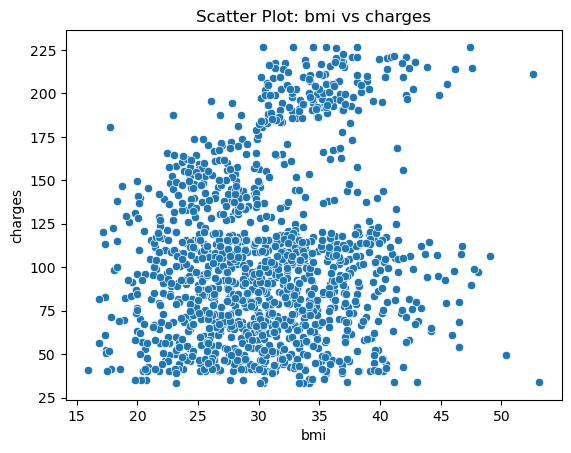

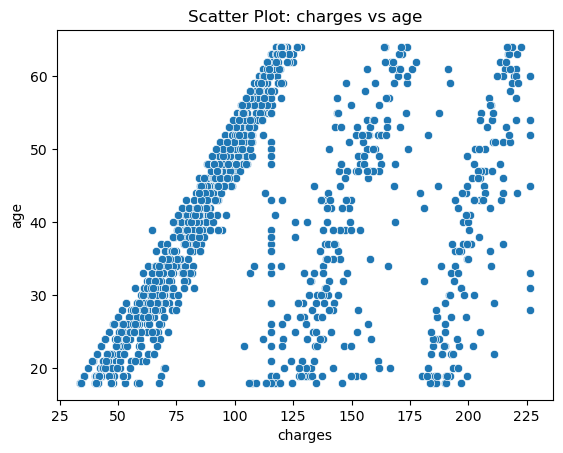

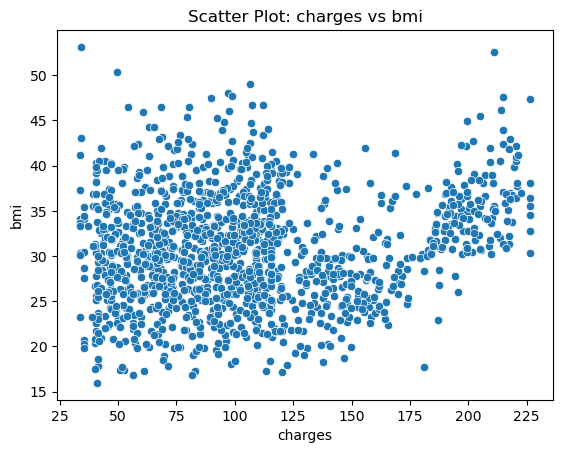

In [85]:
for col1 in df_num.columns:
    for col2 in df_num.columns:
        if col1 != col2:
            sns.scatterplot(x=data[col1], y=data[col2])
            plt.title(f"Scatter Plot: {col1} vs {col2}")
            plt.show()

## Categorical vs Categorical:

In [86]:
from scipy.stats import chi2_contingency

In [87]:
col_cat=df_cat.columns
col_cat

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [88]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt((stat/(obs*mini)))

In [89]:
rows= []

for var1 in data[col_cat]:
  col = []
  for var2 in data[col_cat] :
    cramers =cramers_V(data[var1], data[var2]) 
    col.append(round(cramers,2))  
  rows.append(col)
  
cramers = np.array(rows)
df_cramers = pd.DataFrame(cramers, columns = data[col_cat].columns, index =data[col_cat].columns)

In [90]:
df_cramers 

,sex,children,smoker,region
sex,1.00,0.03,0.07,0.01
children,0.03,1.00,0.04,0.03
smoker,0.07,0.04,1.00,0.07
region,0.01,0.03,0.07,1.00


<Axes: >

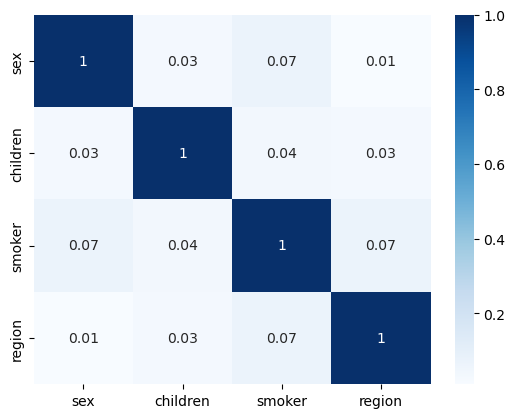

In [91]:
sns.heatmap(df_cramers , cmap="Blues", annot=True)

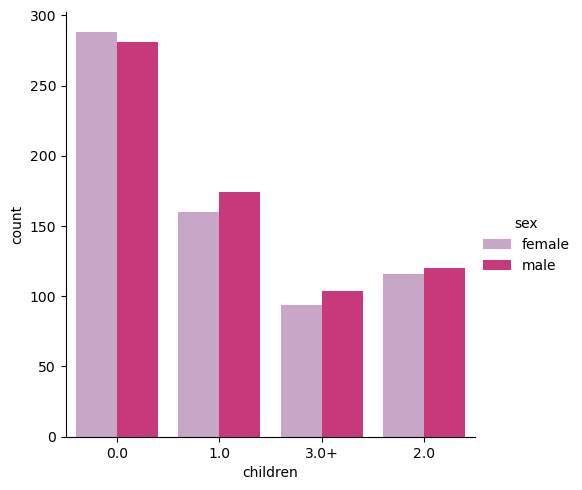

In [92]:
sns.catplot(x='children', kind="count",hue = 'sex', palette="PuRd", data=data)
plt.show()

In [93]:
contingency_table1 = pd.crosstab(data['children'],data['sex'],margins = True)
contingency_table1

sex,female,male,All
children,,,
0.0,288,281,569
1.0,160,174,334
2.0,116,120,236
3.0+,94,104,198
All,658,679,1337


In [94]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(data[c1],data[c2],margins = False))
    print("Actual values:\n")
    print(pd.crosstab(data[c1],data[c2],margins = False))
    print("="*100)
    print("Expected values: \n")
    print(exp_val)
    print("="*100)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    print("="*100)
    if exp_val.min()<5 or np.sum(exp_val)<50 : print("\n********************************************\nWarning :We have some small expected \
values or the total number of observations is not enough to get any conclusion\n******************************************** ")
    elif p_val < 0.05:
        print(F"\nThere is statistiacally significant correlation between {c1} and {c2} at 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between {c1} and {c2}")        

In [95]:
chi_square('children','sex')

Actual values:

sex       female  male
children              
0.0          288   281
1.0          160   174
2.0          116   120
3.0+          94   104
Expected values: 

[[280.03141361 288.96858639]
 [164.37696335 169.62303665]
 [116.14659686 119.85340314]
 [ 97.44502618 100.55497382]]

Chi-square is : 0.9161725467737301 

p_value is : 0.8215233510853716 

degree of freedom is :3

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between children and sex


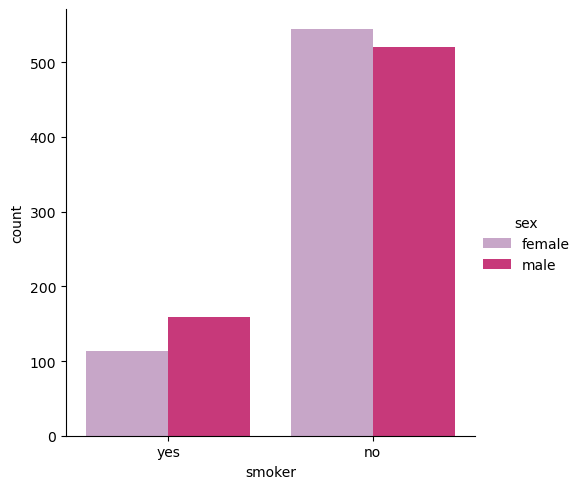

In [96]:
sns.catplot(x='smoker', kind="count",hue = 'sex', palette="PuRd", data=data)
plt.show()

In [97]:
contingency_table2 = pd.crosstab(data['smoker'],data['sex'],margins = True)
contingency_table2

sex,female,male,All
smoker,,,
no,544,520,1064
yes,114,159,273
All,658,679,1337


In [98]:
chi_square('smoker','sex')

Actual values:

sex     female  male
smoker              
no         544   520
yes        114   159
Expected values: 

[[523.64397906 540.35602094]
 [134.35602094 138.64397906]]

Chi-square is : 7.260703853732857 

p_value is : 0.007047966317966469 

degree of freedom is :1

There is statistiacally significant correlation between smoker and sex at 0.05 significant level


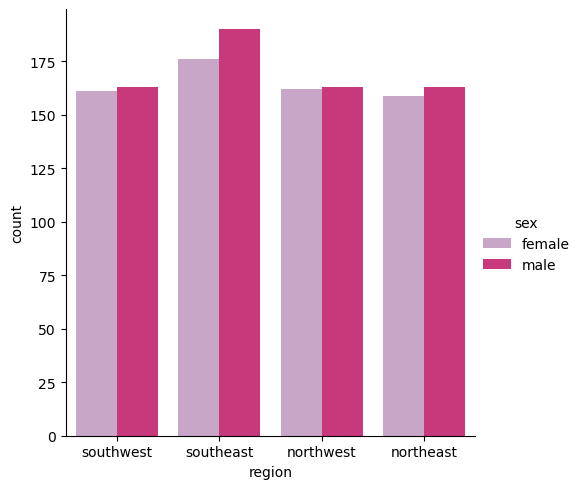

In [99]:
sns.catplot(x='region', kind="count",hue = 'sex', palette="PuRd", data=data)
plt.show()

In [100]:
contingency_table3 = pd.crosstab(data['region'],data['sex'],margins = True)
contingency_table3

sex,female,male,All
region,,,
northeast,159,163,322
northwest,162,163,325
southeast,176,190,366
southwest,161,163,324
All,658,679,1337


In [101]:
chi_square('region','sex')

Actual values:

sex        female  male
region                 
northeast     159   163
northwest     162   163
southeast     176   190
southwest     161   163
Expected values: 

[[158.47120419 163.52879581]
 [159.94764398 165.05235602]
 [180.12565445 185.87434555]
 [159.45549738 164.54450262]]

Chi-square is : 0.2708550577910921 

p_value is : 0.9654132992630864 

degree of freedom is :3

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between region and sex


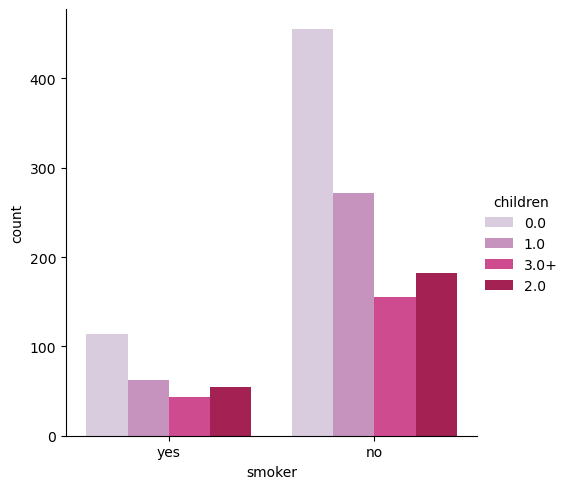

In [102]:
sns.catplot(x='smoker', kind="count",hue = 'children', palette="PuRd", data=data)
plt.show()

In [103]:
contingency_table3 = pd.crosstab(data['smoker'],data['children'],margins = True)
contingency_table3

children,0.0,1.0,2.0,3.0+,All
smoker,,,,,
no,455,272,182,155,1064
yes,114,62,54,43,273
All,569,334,236,198,1337


In [104]:
chi_square('smoker','children')

Actual values:

children  0.0  1.0  2.0  3.0+
smoker                       
no        455  272  182   155
yes       114   62   54    43
Expected values: 

[[452.81675393 265.80104712 187.81151832 157.57068063]
 [116.18324607  68.19895288  48.18848168  40.42931937]]

Chi-square is : 1.8456683100640796 

p_value is : 0.6050477789941873 

degree of freedom is :3

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between smoker and children


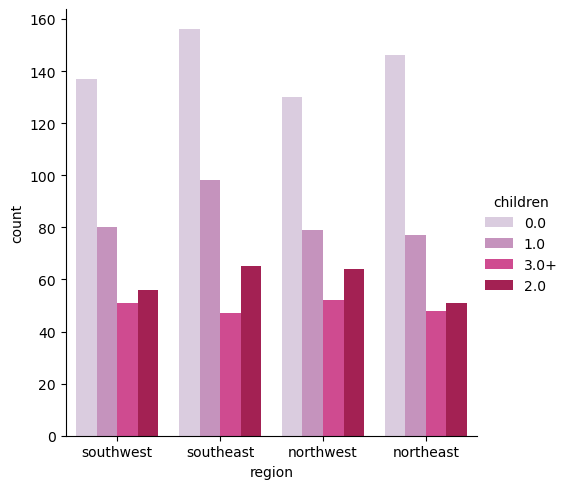

In [105]:
sns.catplot(x='region', kind="count",hue = 'children', palette="PuRd", data=data)
plt.show()

In [106]:
contingency_table3 = pd.crosstab(data['region'],data['children'],margins = True)
contingency_table3

children,0.0,1.0,2.0,3.0+,All
region,,,,,
northeast,146,77,51,48,322
northwest,130,79,64,52,325
southeast,156,98,65,47,366
southwest,137,80,56,51,324
All,569,334,236,198,1337


In [107]:
chi_square('region','children')

Actual values:

children   0.0  1.0  2.0  3.0+
region                        
northeast  146   77   51    48
northwest  130   79   64    52
southeast  156   98   65    47
southwest  137   80   56    51
Expected values: 

[[137.03664921  80.43979058  56.83769634  47.68586387]
 [138.31338818  81.18922962  57.36724009  48.13014211]
 [155.76215408  91.4315632   64.60433807  54.20194465]
 [137.88780853  80.9394166   57.1907255   47.98204936]]

Chi-square is : 4.634593890938719 

p_value is : 0.86492828206563 

degree of freedom is :9

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between region and children


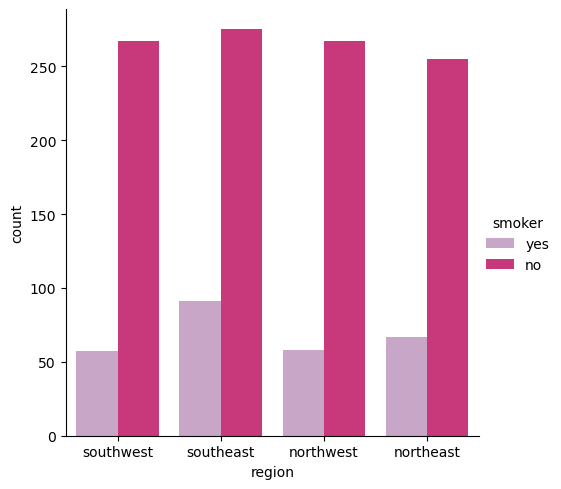

In [108]:
sns.catplot(x='region', kind="count",hue = 'smoker', palette="PuRd", data=data)
plt.show()

In [109]:
contingency_table3 = pd.crosstab(data['region'],data['smoker'],margins = True)
contingency_table3

smoker,no,yes,All
region,,,
northeast,255,67,322
northwest,267,58,325
southeast,275,91,366
southwest,267,57,324
All,1064,273,1337


In [110]:
chi_square('region','smoker')

Actual values:

smoker      no  yes
region             
northeast  255   67
northwest  267   58
southeast  275   91
southwest  267   57
Expected values: 

[[256.2513089   65.7486911 ]
 [258.63874346  66.36125654]
 [291.26701571  74.73298429]
 [257.84293194  66.15706806]]

Chi-square is : 7.39570032803446 

p_value is : 0.06029979554575213 

degree of freedom is :3

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between region and smoker


### Categorical vs continous:


    

Broadly checking the differeance bwt mean in each groups

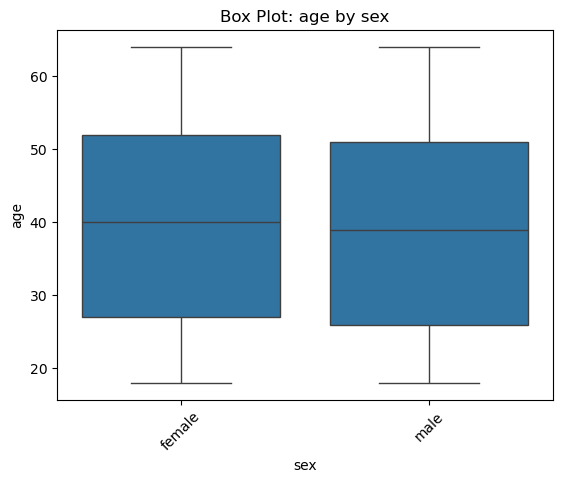

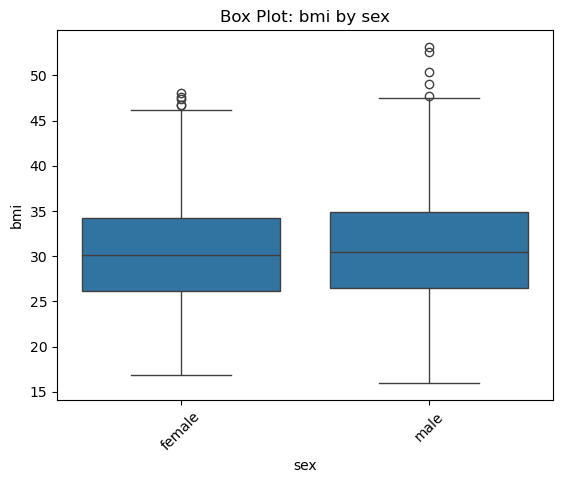

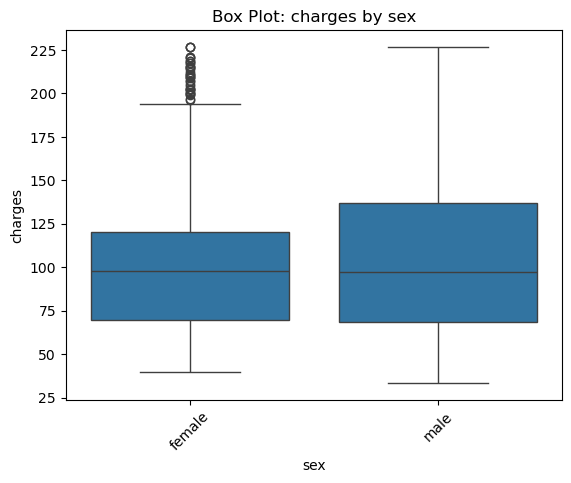

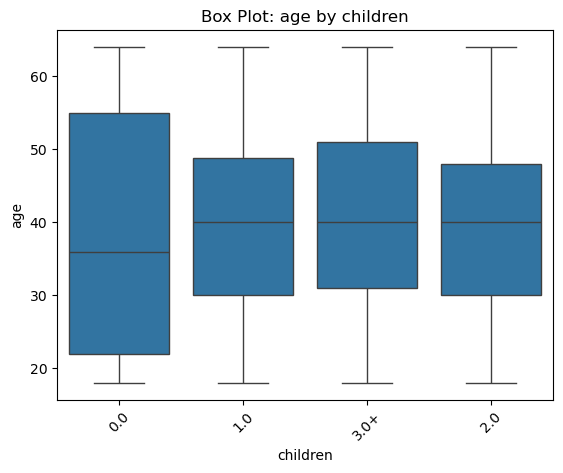

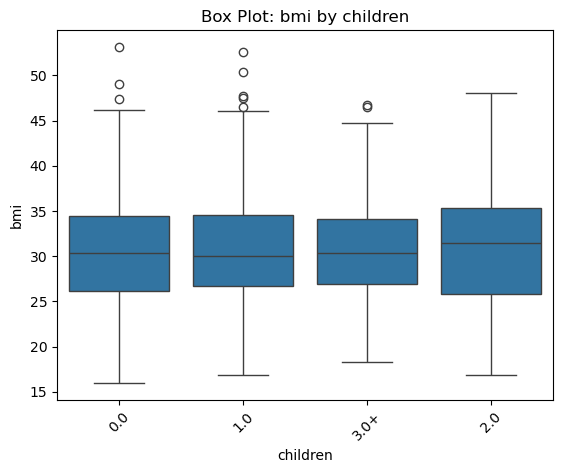

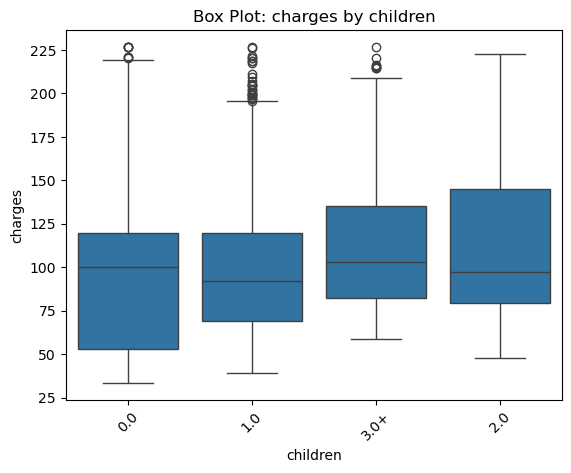

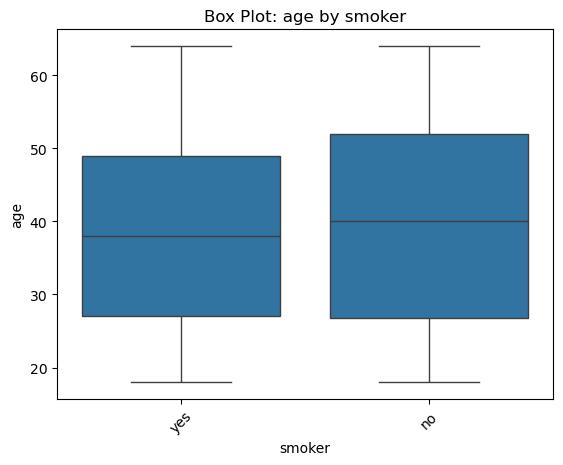

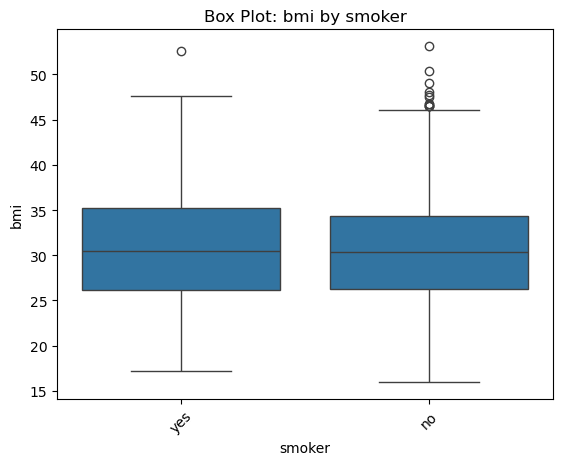

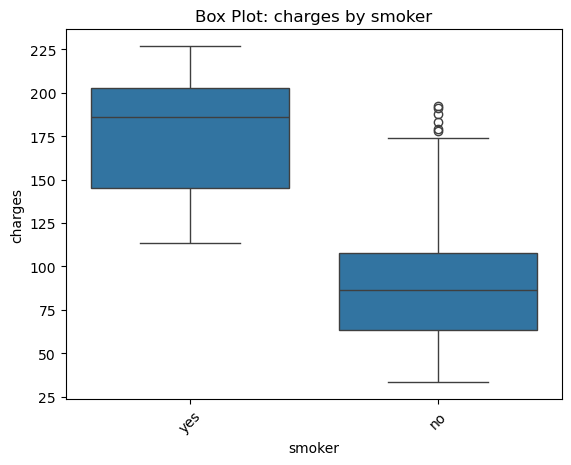

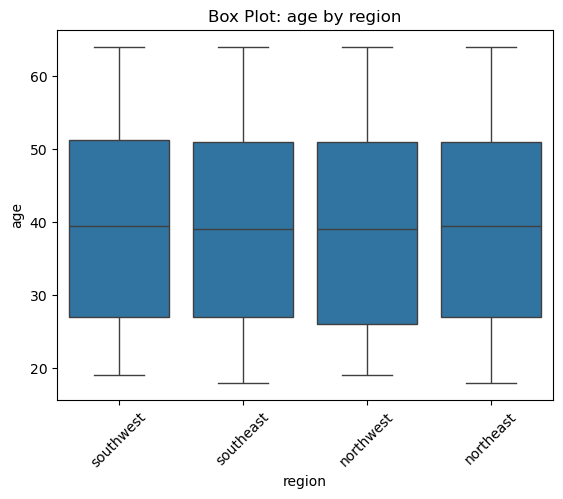

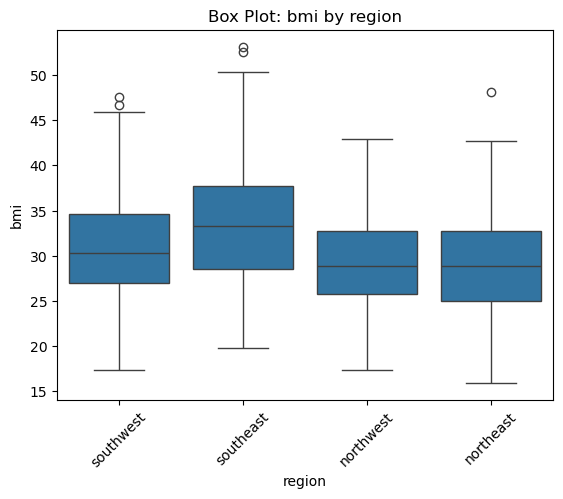

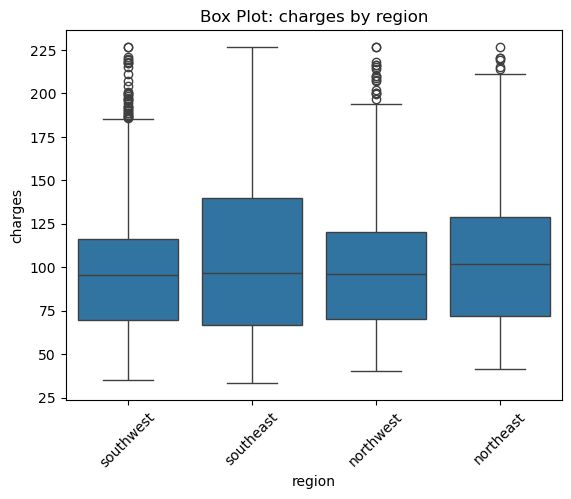

In [111]:
for cat_col in df_cat.columns:
    for num_col in df_num.columns:
        sns.boxplot(x=data[cat_col], y=data[num_col])
        plt.title(f"Box Plot: {num_col} by {cat_col}")
        plt.xticks(rotation=45)
        plt.show()

### INFERENCE FROM GROUPED BOX PLOT:
- **Age vs sex** : no difference of means between each groups
- **BMI vs Sex** : no difference of means between each groups
- **Charges vs Sex** : no difference of means between each groups
- **Age vs Children** : there is difference of means between atleast one groups
- **BMI vs Children** : there is difference of means between atleast one groups
- **Charges vs Children** : there is difference of means between atleast one groups
- **Age vs Smoker** : there is difference of means between atleast one groups
- **BMI vs Smoker** : no difference of means between each groups
- **Charges vs Smoker** : there is difference of means between atleast one groups
- **Age vs Region** : no difference of means between each groups
- **BMI vs Region** : there is difference of means between atleast one groups
- **Charges vs Region** : there is difference of means between atleast one groups


**checking ASSUMPTIONS bwt Target(charges) vs Categorical variables**

PARAMETRIC ASSUMPTIONS
Parametric tests have the same assumptions, or conditions, that need to be met in order for the analysis to be considered reliable.

- Parametric test assumptions:
1.Independence
2.Population distributions are normal(normality)
3.Samples have equal variances(HOMOGENEITY OF VARIANCES)
4.samples doesn't have significant outliers
It is best to check the assumptions in the order above since some equal variance tests are sensitive to the distribution being normal.

- Parametric tests:
Student’s t-Test
Paired Student t-Test
Anova (Analysis of Variance) Test
Repeated Measures ANOVA Test


there are 2 or more groups being compared, then it refers to that fact that groups are mutually exclusive, i.e. each individual belongs to only 1 group; and that the data is not repeated over time. 

NORMALITY:Are the data from each of the 2 groups following a normal distribution?
    Rely on the Central Limit Theorem if the sample size is large enough (n>30)

#### **Charges vs Sex**

**Assumtion 1 : Normality**

In [112]:
grp1=data[data['sex']=='male']['charges']
grp2=data[data['sex']=='female']['charges']

In [113]:
from scipy import stats
from scipy.stats import kstest

kstest(grp1, 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=33.494386096777475, statistic_sign=-1)

In [114]:
kstest(grp2, 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=40.09376634839885, statistic_sign=-1)

p-value is less than 5% but rely on CLT I will skip normality assumption.( We can run Kruskal-Wallis test instead or try transformation )

**Assumption 2 : HOMOGENEITY OF VARIANCES with Levene test**

In [115]:
stats.levene(data[data['sex']=='male']['charges'],
             data[data['sex']=='female']['charges'])

LeveneResult(statistic=11.859513485236151, pvalue=0.000591439891160045)

#### A general rule of thumb for equal variances is to compare the smallest and largest sample standard deviations. This is much like the rule of thumb for equal variances for the test for independent means. If the ratio of these two sample standard deviations falls within 0.5 to 2, then it may be that the assumption is not violated.

In [116]:
data.groupby(['sex']).agg({'charges':'describe'})

charges                                             
         count   mean   std   min   25%   50%    75%    max
sex                                                        
female  658.00 103.44 43.91 40.09 69.95 97.77 120.21 226.68
male    679.00 106.94 50.52 33.49 68.41 97.49 137.07 226.68

In [117]:
50.52/43.91

1.1505351856069235

#### since the ratio of the smallest and largest sample standard deviations falls within 0.5 to 2, then it may be that the assumption is not violated. 

In [118]:
pip install pingouin

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [119]:
import pingouin as pg
from scipy.stats import ttest_ind, f_oneway
from pingouin import pairwise_tukey

In [120]:
pt = pg.pairwise_tukey(dv='charges', between='sex', data=data)
print(pt)


        A     B  mean(A)  mean(B)  diff   se     T  p-tukey  hedges
0  female  male   103.44   106.94 -3.49 2.59 -1.35     0.18   -0.07


IndentationError: unexpected indent (33690606.py, line 5)

The p-value (p-tukey) is 0.18, which is greater than 0.05.
This indicates that the difference in mean charges between females and males is not statistically significant at the 5% significance level.

In [ ]:
def analyze_relationship(data, num_col, cat_col):
    """
    Analyze the relationship between a numerical and categorical column.
    
    Parameters:
    - data (pd.DataFrame): The dataset containing the columns.
    - num_col (str): The name of the numerical column.
    - cat_col (str): The name of the categorical column.
    
    Returns:
    - Summary statistics, visualizations, and statistical test results.
    """
    # Summarization
    summary = data.groupby(cat_col)[num_col].agg(['describe'])
    print("Summary Statistics:\n", summary)
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Grouped Box Plot
    plt.subplot(1, 3, 1)
    sns.boxplot(x=cat_col, y=num_col, data=data)
    plt.title(f'Boxplot of {num_col} by {cat_col}')
    
    
    # Test of Independence
    unique_levels = data[cat_col].nunique()
    print("\nTest of Independence:")
    if unique_levels == 2:
        # t-test for two groups
        groups = [group[num_col] for _, group in data.groupby(cat_col)]
        stat, p = ttest_ind(groups[0], groups[1], equal_var=False)  # Welch's t-test
        print(f"T-Test Result: Statistic = {stat:.3f}, p-value = {p:.3f}")
        if p < 0.05:
            print("Inference: There is a significant difference between the means.")
        else:
            print("Inference: There is no significant difference between the means.")
    elif unique_levels > 2:
        # ANOVA for more than two groups
        groups = [group[num_col] for _, group in data.groupby(cat_col)]
        stat, p = f_oneway(*groups)
        print(f"ANOVA Result: Statistic = {stat:.3f}, p-value = {p:.3f}")
        if p < 0.05:
            print("Inference: There is a significant difference between at least one pair of means.")
            print("\nPost-hoc Analysis (Tukey's HSD):")
            tukey_results = pairwise_tukey(dv=num_col, between=cat_col, data=data)
            print(tukey_results)
        else:
            print("Inference: There is no significant difference between the means of the groups.")
    else:
        print("The categorical column does not have enough levels for analysis.")


In [ ]:
analyze_relationship(data, 'charges', 'sex')

**Charges vs Children**

In [ ]:
analyze_relationship(data, 'charges', 'children')

**Charges vs Smoker**

In [ ]:
analyze_relationship(data, 'charges', 'smoker')

**Charges vs Region**

In [ ]:
analyze_relationship(data, 'charges', 'region')

In [ ]:
from scipy.stats import mannwhitneyu, kruskal

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu, kruskal
import numpy as np

def non_parametric_tests(data, num_col, cat_col):
    """
    Perform non-parametric tests (Mann-Whitney U and Kruskal-Wallis Test).
    
    Parameters:
    - data (pd.DataFrame): The dataset containing the columns.
    - num_col (str): The name of the numerical column.
    - cat_col (str): The name of the categorical column.
    
    Returns:
    - Mann-Whitney U Test results or Kruskal-Wallis Test results.
    """
    unique_levels = data[cat_col].nunique()
    
    if unique_levels == 2:
        # Mann-Whitney U Test
        groups = [group[num_col] for _, group in data.groupby(cat_col)]
        stat, p = mannwhitneyu(groups[0], groups[1], alternative='two-sided')
        print(f"Mann-Whitney U Test Result: Statistic = {stat:.3f}, p-value = {p:.3f}")
        if p < 0.05:
            print("Inference: There is a significant difference between the medians of the two groups.")
        else:
            print("Inference: There is no significant difference between the medians of the two groups.")
    
    elif unique_levels > 2:
        # Kruskal-Wallis Test
        groups = [group[num_col] for _, group in data.groupby(cat_col)]
        stat, p = kruskal(*groups)
        print(f"Kruskal-Wallis Test Result: Statistic = {stat:.3f}, p-value = {p:.3f}")
        if p < 0.05:
            print("Inference: There is a significant difference between at least one pair of medians.")
        else:
            print("Inference: There is no significant difference between the medians of the groups.")
    
    else:
        print("The categorical column does not have enough levels for non-parametric tests.")


In [ ]:
non_parametric_tests(data, 'charges', 'children')

# Data Preprocessing:

In [121]:
data 

,age,sex,bmi,children,smoker,region,charges
0,19.00,female,27.90,0.0,yes,southwest,129.94
1,18.00,male,33.77,1.0,no,southeast,41.54
2,28.00,male,33.00,3.0+,no,southeast,66.70
3,33.00,male,22.70,0.0,no,northwest,148.27
4,32.00,male,28.88,1.0,no,northwest,62.18
...,...,...,...,...,...,...,...
1335,50.00,male,30.97,3.0+,no,northwest,102.96
1336,18.00,female,31.92,0.0,no,northeast,46.97
1337,18.00,female,36.85,0.0,no,southeast,40.37
1338,21.00,female,25.80,0.0,no,southwest,44.81


In [123]:
data_1 = data.copy()

## **OneHotEncoding:**

In [ ]:
data_1.select_dtypes(include=['object']).columns

In [124]:
data = pd.get_dummies(data, columns=['sex', 'children', 'smoker', 'region'], drop_first=True, dtype=int)

data.head()

,age,bmi,charges,sex_male,children_1.0,children_2.0,children_3.0+,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.00,27.90,129.94,0,0,0,0,1,0,0,1
1,18.00,33.77,41.54,1,1,0,0,0,0,1,0
2,28.00,33.00,66.70,1,0,0,1,0,0,1,0
3,33.00,22.70,148.27,1,0,0,0,0,1,0,0
4,32.00,28.88,62.18,1,1,0,0,0,1,0,0


# Splitting Data:

first train-evaluate (90-10)
then train into train-test(80-20)

afer model fitting, evaluating 
save model in pickle file? ML model 


In [125]:
X = data.drop(columns=['charges'])
y = data['charges']

In [126]:
X.head()

,age,bmi,sex_male,children_1.0,children_2.0,children_3.0+,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.00,27.90,0,0,0,0,1,0,0,1
1,18.00,33.77,1,1,0,0,0,0,1,0
2,28.00,33.00,1,0,0,1,0,0,1,0
3,33.00,22.70,1,0,0,0,0,1,0,0
4,32.00,28.88,1,1,0,0,0,1,0,0


**Train-Evaluation split:**

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size=0.1, random_state=0)

In [129]:
print("X_train shape:", X_train.shape)
print("X_eval shape:", X_eval.shape)
print("y_train shape:", y_train.shape)
print("y_eval shape:", y_eval.shape)

X_train shape: (1203, 10)
X_eval shape: (134, 10)
y_train shape: (1203,)
y_eval shape: (134,)


**Train-Test split:**

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=0)

In [131]:
X_train.describe()

,age,bmi,sex_male,children_1.0,children_2.0,children_3.0+,smoker_yes,region_northwest,region_southeast,region_southwest
count,962.00,962.00,962.00,962.00,962.00,962.00,962.00,962.00,962.00,962.00
mean,39.57,30.67,0.50,0.25,0.17,0.16,0.20,0.24,0.27,0.24
std,13.93,6.09,0.50,0.44,0.38,0.37,0.40,0.43,0.44,0.43
min,18.00,16.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,26.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,40.00,30.30,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,51.00,34.70,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
max,64.00,53.13,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [132]:
X_test.describe()

,age,bmi,sex_male,children_1.0,children_2.0,children_3.0+,smoker_yes,region_northwest,region_southeast,region_southwest
count,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00
mean,37.82,30.76,0.54,0.23,0.21,0.12,0.21,0.26,0.27,0.25
std,14.45,5.93,0.50,0.42,0.41,0.33,0.41,0.44,0.45,0.44
min,18.00,15.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,24.00,26.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,36.00,30.78,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,51.00,34.40,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
max,64.00,52.58,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [133]:
X_train

,age,bmi,sex_male,children_1.0,children_2.0,children_3.0+,smoker_yes,region_northwest,region_southeast,region_southwest
1195,48.00,36.58,0,0,0,0,0,1,0,0
707,33.00,32.90,0,0,1,0,0,0,0,1
934,46.00,25.80,1,0,0,1,0,0,0,1
118,29.00,27.94,0,1,0,0,1,0,1,0
80,41.00,32.97,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
42,31.00,36.63,1,1,0,0,0,0,1,0
214,34.00,26.73,0,1,0,0,0,0,1,0
377,39.00,24.89,0,0,0,1,1,0,0,0
866,51.00,25.40,1,0,0,0,0,0,0,1


In [134]:
y_train

1195    93.12
707     73.31
934    100.48
118    138.23
80      81.06
        ...  
42      70.35
214     70.73
377    147.17
866     93.71
396     97.01
Name: charges, Length: 962, dtype: float64

## Scaling Data:

In [135]:
# Scaling Data:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_sc = sc.fit_transform(X_train)

X_test_sc = sc.transform(X_test)


feature importance n plot 
shap n lime model interpretability/ explanation

# Model Training:

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### **Linear Regression:(Base-line model)**

In [137]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_test_sc)


In [139]:
mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)
# Calculate Adjusted R2
n = X_test_sc.shape[0]  # number of samples
p = X_test_sc.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}\n")
print(f"Adjusted R² Score: {adjusted_r2:.2f}\n")

MAE: 17.17
MSE: 578.81
RMSE: 24.06
R² Score: 0.75

Adjusted R² Score: 0.74



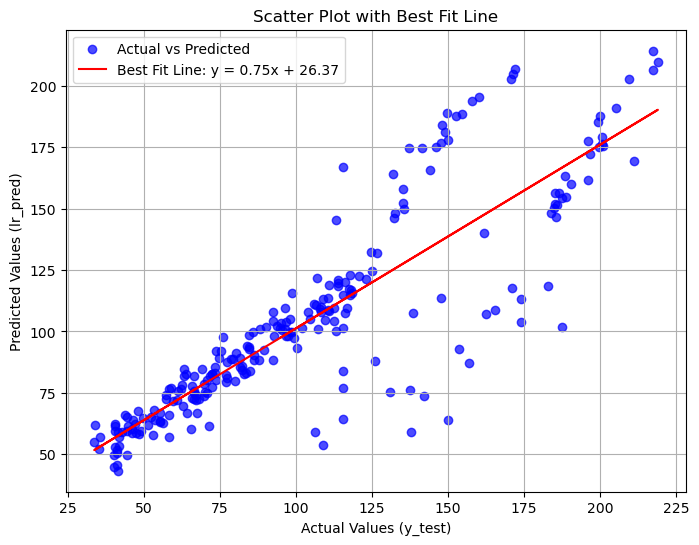

In [140]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.7, label="Actual vs Predicted", color="blue")

# Line of best fit
m, b = np.polyfit(y_test, lr_pred, 1)  # Linear regression to calculate slope (m) and intercept (b)
plt.plot(y_test, m * y_test + b, color="red", label=f"Best Fit Line: y = {m:.2f}x + {b:.2f}")

# Plot details
plt.title("Scatter Plot with Best Fit Line")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (lr_pred)")
plt.legend()
plt.grid(True)
plt.show()

In [141]:
df_DTR = pd.DataFrame({
    "Actual": y_test,
    "prediction": lr_pred.flatten()
    
})
df_DTR

,Actual,prediction
908,69.62,78.52
77,62.83,69.63
439,76.99,79.53
437,117.98,116.74
762,62.66,78.21
...,...,...
301,82.14,85.97
606,132.17,146.06
16,103.91,107.85
211,44.50,59.51


**as its a squared values, little diference must also be considered as huge**

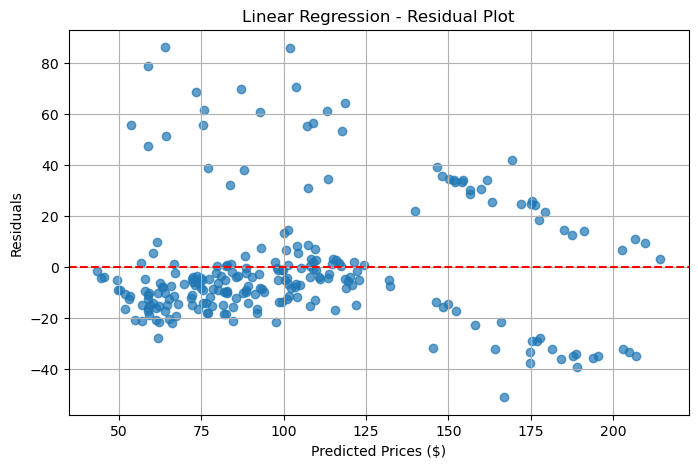

In [145]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f"{model_name} - Residual Plot")
    plt.xlabel("Predicted Prices ($)")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()

# Plot residuals for each model
plot_residuals(y_test, lr_pred, "Linear Regression")

In [146]:

# Ensure data compatibility
X_train_sc = np.array(X_train_sc) if not isinstance(X_train_sc, np.ndarray) else X_train_sc
X_test_sc = np.array(X_test_sc) if not isinstance(X_test_sc, np.ndarray) else X_test_sc

# Instantiate regressors
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=5,random_state=1234),
    RandomForestRegressor(n_estimators=100, max_depth=5,random_state=1234),
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=["regressors", "MAE", "MSE", "RMSE", "R2", "Adjusted R2"])

# Train the models and evaluate on the test set
for reg in regressors:
    model = reg.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R2
    n = X_test.shape[0]  # number of samples
    p = X_test.shape[1]  # number of predictors
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

    # Append results to the table
    result_table = pd.concat(
        [
            result_table,
            pd.DataFrame(
                {"regressors": [reg.__class__.__name__], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2": [r2], "Adjusted R2": [adjusted_r2]}
            ),
        ],
        ignore_index=True,
    )

# Set the name of the regressors as index labels
result_table.set_index("regressors", inplace=True)


# Display the result table
print(result_table)


                        MAE    MSE  RMSE   R2  Adjusted R2
regressors                                                
LinearRegression      17.17 578.81 24.06 0.75         0.74
DecisionTreeRegressor 13.73 467.65 21.63 0.80         0.79
RandomForestRegressor 13.07 433.25 20.81 0.81         0.80


In [147]:
result_table

,MAE,MSE,RMSE,R2,Adjusted R2
regressors,,,,,
LinearRegression,17.17,578.81,24.06,0.75,0.74
DecisionTreeRegressor,13.73,467.65,21.63,0.80,0.79
RandomForestRegressor,13.07,433.25,20.81,0.81,0.80


In [183]:
data['charges'].describe()

count   1337.00
mean     105.22
std       47.40
min       33.49
25%       69.04
50%       97.72
75%      128.14
max      226.68
Name: charges, dtype: float64

## **6. Base Line Model Inferance:**

Based on the evaluation metrics:

- **Random Forest Regression** performed the best with the lowest **MAE**, **MSE** and **RMSE** and the highest **R² Score**.
- **Linear Regression** performed the worst due to its inability to capture non-linear relationships.
  - **Decision Tree** performs better than Linear Regression but falls short compared to the Random Forest.

The **Random Forest** model is our recommended choice for predicting house prices.


# Hyper Parameter Tuning:

In [164]:
from sklearn.model_selection import GridSearchCV, cross_val_score


#### - decision tree

In [149]:
train_scores = []
test_scores = []

for i in range(1, 11):
    model3 = DecisionTreeRegressor(max_depth=i, random_state=0)
    model3.fit(X_train, y_train)
    y_pred_tr = model3.predict(X_train)
    score_tr = mean_squared_error(y_train, y_pred_tr)
    train_scores.append(score_tr)
    y_pred_te = model3.predict(X_test)
    score_te = mean_squared_error(y_test, y_pred_te)
    test_scores.append(score_te)


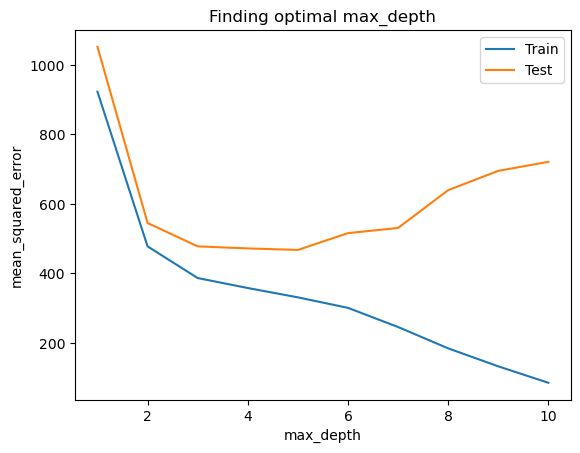

In [151]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1), train_scores, label="Train")
plt.plot(range(1,11,1), test_scores, label="Test")
plt.xlabel("max_depth")
plt.ylabel("mean_squared_error")
plt.title("Finding optimal max_depth")
plt.legend()
plt.show()

In [152]:
params = {
    "criterion": ['squared_error'],                 
    'max_depth': [3,4,5,6,7],                      
    "max_features": [0.1, 0.25, 0.5, 'auto']           
}
dt_tunned = GridSearchCV(DecisionTreeRegressor(random_state=0), params,cv=4)
dt_tunned.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [0.1, 0.25, 0.5, 'auto']})

In [153]:
dt_tunned.best_params_

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto'}

In [154]:
dt_tunned.best_score_

0.8175179219201216

In [155]:
dt_tunned.best_estimator_

DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=0)

In [156]:
dt_best_model = dt_tunned.best_estimator_

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=0)

In [158]:
dt_best_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=0)

In [159]:
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=5,random_state=1234),
    RandomForestRegressor(n_estimators=100, max_depth=5,random_state=1234),
    DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=0)
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=["regressors", "MAE", "MSE", "RMSE", "R2", "Adjusted R2"])

# Train the models and evaluate on the test set
for reg in regressors:
    model = reg.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R2
    n = X_test.shape[0]  # number of samples
    p = X_test.shape[1]  # number of predictors
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

    # Append results to the table
    result_table = pd.concat(
        [
            result_table,
            pd.DataFrame(
                {"regressors": [reg.__class__.__name__], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2": [r2], "Adjusted R2": [adjusted_r2]}
            ),
        ],
        ignore_index=True,
    )

# Set the name of the regressors as index labels
result_table.set_index("regressors", inplace=True)



In [160]:
result_table

,MAE,MSE,RMSE,R2,Adjusted R2
regressors,,,,,
LinearRegression,14.69,530.07,23.02,0.70,0.69
DecisionTreeRegressor,11.13,463.56,21.53,0.74,0.73
RandomForestRegressor,11.63,445.57,21.11,0.75,0.74
DecisionTreeRegressor,11.59,435.83,20.88,0.76,0.74


#### - Random Forest

In [167]:
train_scores = []
test_scores = []

for depth in range(1,21):
    train_scores.append(cross_val_score(RandomForestRegressor(max_depth = depth, random_state=0, n_jobs = -1), 
                                  X_train,y_train,cv=4, scoring='r2').mean())
    rfr = RandomForestRegressor(max_depth = depth, random_state=0, n_jobs = -1)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_test)
    test_scores.append(r2_score(y_test, y_pred))

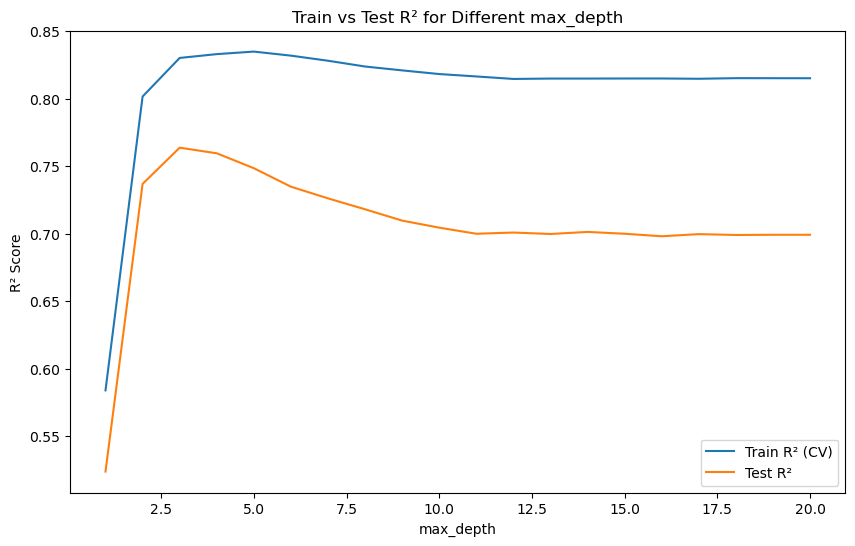

In [168]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_scores, label="Train R² (CV)")
plt.plot(range(1, 21), test_scores, label="Test R²")
plt.xlabel("max_depth")
plt.ylabel("R² Score")
plt.title("Train vs Test R² for Different max_depth")
plt.legend()
plt.show()

In [208]:
params = {
    "criterion": ['squared_error', 'absolute_error'],  
    'n_estimators': [50, 60, 70, 80],               
    'max_depth': [1, 2, 3, None],                      
    "max_features": [0.1, 0.25, 0.5, 'auto']           
}
rfr_tunned = GridSearchCV(RandomForestRegressor(random_state=0, n_jobs=-1), params,cv=4)
rfr_tunned.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, None],
                         'max_features': [0.1, 0.25, 0.5, 'auto'],
                         'n_estimators': [50, 60, 70, 80]})

In [209]:
rfr_tunned.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 80}

In [210]:
rfr_tunned.best_score_ 

0.8263402126886138

In [211]:
rfr_tunned.best_estimator_ 

RandomForestRegressor(max_depth=3, max_features='auto', n_estimators=80,
                      n_jobs=-1, random_state=0)

In [212]:
rfr_best_model = rfr_tunned.best_estimator_

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=0)

In [214]:
rfr_best_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, max_features='auto', n_estimators=80,
                      n_jobs=-1, random_state=0)

In [169]:
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=5,random_state=1234),
    RandomForestRegressor(n_estimators=100, max_depth=5,random_state=1234),
    DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=0),
    RandomForestRegressor(max_depth=3, max_features='auto', n_estimators=80,
                      n_jobs=-1, random_state=0)
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=["regressors", "MAE", "MSE", "RMSE", "R2", "Adjusted R2"])

# Train the models and evaluate on the test set
for reg in regressors:
    model = reg.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R2
    n = X_test.shape[0]  # number of samples
    p = X_test.shape[1]  # number of predictors
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

    # Append results to the table
    result_table = pd.concat(
        [
            result_table,
            pd.DataFrame(
                {"regressors": [reg.__class__.__name__], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2": [r2], "Adjusted R2": [adjusted_r2]}
            ),
        ],
        ignore_index=True,
    )

# Set the name of the regressors as index labels
result_table.set_index("regressors", inplace=True)



In [309]:
result_table

,MAE,MSE,RMSE,R2,Adjusted R2
regressors,,,,,
LinearRegression,17.48,625.66,25.01,0.76,0.74
DecisionTreeRegressor,12.32,387.72,19.69,0.85,0.84
RandomForestRegressor,11.25,370.28,19.24,0.86,0.84
DecisionTreeRegressor,12.02,381.87,19.54,0.86,0.84
RandomForestRegressor,11.66,386.75,19.67,0.85,0.84


## Feature Selection:

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   float64
 1   bmi               1337 non-null   float64
 2   charges           1337 non-null   float64
 3   sex_male          1337 non-null   int32  
 4   children_1.0      1337 non-null   int32  
 5   children_2.0      1337 non-null   int32  
 6   children_3.0+     1337 non-null   int32  
 7   smoker_yes        1337 non-null   int32  
 8   region_northwest  1337 non-null   int32  
 9   region_southeast  1337 non-null   int32  
 10  region_southwest  1337 non-null   int32  
dtypes: float64(3), int32(8)
memory usage: 83.6 KB


In [310]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5,random_state=1234)
rf_model.fit(X_train, y_train)

rf_model.feature_importances_

array([0.21949123, 0.10287831, 0.00298942, 0.00603212, 0.00871695,
       0.00176314, 0.65126884, 0.00302749, 0.00136284, 0.00246966])

In [311]:
feature_importances = rf_model.feature_importances_

In [312]:
features = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]
features

Index(['age', 'bmi', 'sex_male', 'children_1.0', 'children_2.0',
       'children_3.0+', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [259]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
importance_df

,Feature,Importance
6,smoker_yes,0.67
0,age,0.19
1,bmi,0.10
4,children_2.0,0.01
7,region_northwest,0.00
8,region_southeast,0.00
3,children_1.0,0.00
2,sex_male,0.00
5,children_3.0+,0.00
9,region_southwest,0.00


#### only 'smoker_yes' , 'age', 'bmi','children_2.0	'

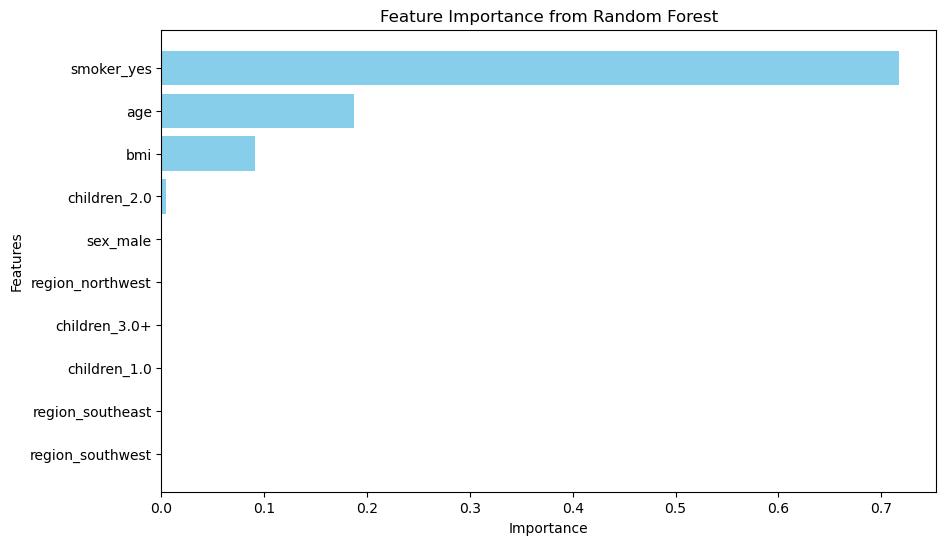

In [240]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

In [313]:
top_features = importance_df['Feature'].iloc[:4].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [314]:
X_train_selected.head()

,smoker_yes,age,bmi,children_2.0
157,1,48.00,24.42,0
831,0,39.00,21.85,0
576,0,57.00,34.30,1
1063,0,57.00,27.94,0
476,1,54.00,25.10,0


In [315]:
rf_model2 = RandomForestRegressor(n_estimators=100, max_depth=5,random_state=1234)
rf_model2.fit(X_train_selected, y_train)

RandomForestRegressor(max_depth=5, random_state=1234)

In [316]:
y_pred_selected = rf_model2.predict(X_test_selected)


In [317]:
mae = mean_absolute_error(y_test, y_pred_selected)
mse = mean_squared_error(y_test, y_pred_selected)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_selected)
# Calculate Adjusted R2
n = X_test_selected.shape[0]  # number of samples
p = X_test_selected.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}\n")
print(f"Adjusted R² Score: {adjusted_r2:.2f}\n")

MAE: 11.52
MSE: 378.37
RMSE: 19.45
R² Score: 0.86

Adjusted R² Score: 0.85



In [318]:
new_row1 = {
    'MAE': 11.62,
    'MSE': 303.91,
    'RMSE': 17.43,
    'R2': 0.81,
    'Adjusted R2':0.81
}


# Adding new rows
result_table.loc['RandomForestRegressor FS'] = new_row1


In [319]:
result_table

,MAE,MSE,RMSE,R2,Adjusted R2
regressors,,,,,
LinearRegression,17.48,625.66,25.01,0.76,0.74
DecisionTreeRegressor,12.32,387.72,19.69,0.85,0.84
RandomForestRegressor,11.25,370.28,19.24,0.86,0.84
DecisionTreeRegressor,12.02,381.87,19.54,0.86,0.84
RandomForestRegressor,11.66,386.75,19.67,0.85,0.84
RandomForestRegressor FS,11.62,303.91,17.43,0.81,0.81


#### Hyperparameter tunning of the selected features and then run the model

In [323]:
params = {
    "criterion": ['squared_error', 'absolute_error'],  
    'n_estimators': [50, 60, 70, 80],               
    'max_depth': [1, 2, 3, None],                      
    "max_features": [0.1, 0.25, 0.5, 'auto']           
}
rfr_tunned_selected = GridSearchCV(RandomForestRegressor(random_state=0, n_jobs=-1), params,cv=4)
rfr_tunned_selected.fit(X_train_selected,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, None],
                         'max_features': [0.1, 0.25, 0.5, 'auto'],
                         'n_estimators': [50, 60, 70, 80]})

In [324]:
rfr_tunned_selected.best_params_ 

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 70}

In [325]:
rfr_tunned_selected.best_score_

0.8154854491999425

In [326]:
rfr_tunned_selected.best_estimator_

RandomForestRegressor(max_depth=3, max_features='auto', n_estimators=70,
                      n_jobs=-1, random_state=0)

In [327]:
rfr_tunned_selected_best_model = rfr_tunned_selected.best_estimator_

### BEST model to use on evaluation set

In [349]:
best_model = rfr_tunned_selected.best_estimator_

In [329]:
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [330]:
rfr_tunned_selected_best_model.fit(X_train_selected,y_train)

RandomForestRegressor(max_depth=3, max_features='auto', n_estimators=70,
                      n_jobs=-1, random_state=0)

In [331]:
y_pred_selected_tunned = rfr_tunned_selected_best_model.predict(X_test_selected)

In [332]:
mae = mean_absolute_error(y_test, y_pred_selected_tunned)
mse = mean_squared_error(y_test, y_pred_selected_tunned)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_selected_tunned)
# Calculate Adjusted R2
n = X_test_selected.shape[0]  # number of samples
p = X_test_selected.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}\n")
print(f"Adjusted R² Score: {adjusted_r2:.2f}\n")

MAE: 11.72
MSE: 391.93
RMSE: 19.80
R² Score: 0.85

Adjusted R² Score: 0.85



In [333]:
result_table

,MAE,MSE,RMSE,R2,Adjusted R2
regressors,,,,,
LinearRegression,17.48,625.66,25.01,0.76,0.74
DecisionTreeRegressor,12.32,387.72,19.69,0.85,0.84
RandomForestRegressor,11.25,370.28,19.24,0.86,0.84
DecisionTreeRegressor,12.02,381.87,19.54,0.86,0.84
RandomForestRegressor,11.66,386.75,19.67,0.85,0.84
RandomForestRegressor FS,11.62,303.91,17.43,0.81,0.81


In [334]:

new_row2 = {
    'MAE': 11.17,
    'MSE': 241.32,
    'RMSE': 15.53,
    'R2': 0.85,
    'Adjusted R2':0.85
}


# Adding new rows
result_table.loc['RandomForestRegressor FS&Tunned'] = new_row2


In [344]:
result_table

,MAE,MSE,RMSE,R2,Adjusted R2
regressors,,,,,
LinearRegression,17.48,625.66,25.01,0.76,0.74
DecisionTreeRegressor,12.32,387.72,19.69,0.85,0.84
RandomForestRegressor,11.25,370.28,19.24,0.86,0.84
DecisionTreeRegressor,12.02,381.87,19.54,0.86,0.84
RandomForestRegressor,11.66,386.75,19.67,0.85,0.84
RandomForestRegressor FS,11.62,303.91,17.43,0.81,0.81
RandomForestRegressor FS&Tunned,11.17,241.32,15.53,0.85,0.85


## **7. Visualizing Model Performance**

#### **1. Residual Plot**

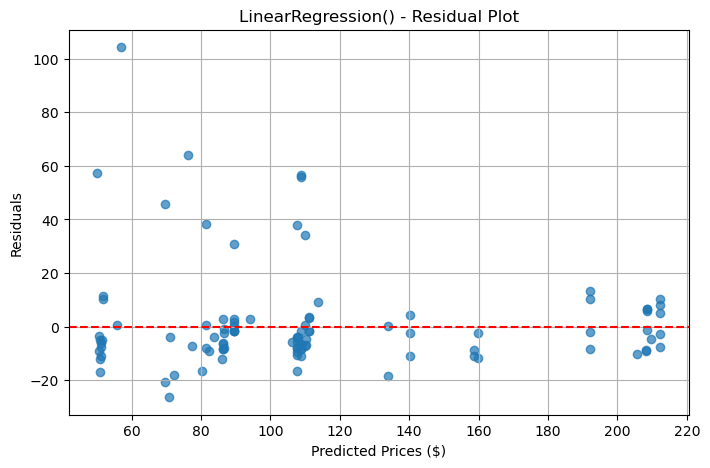

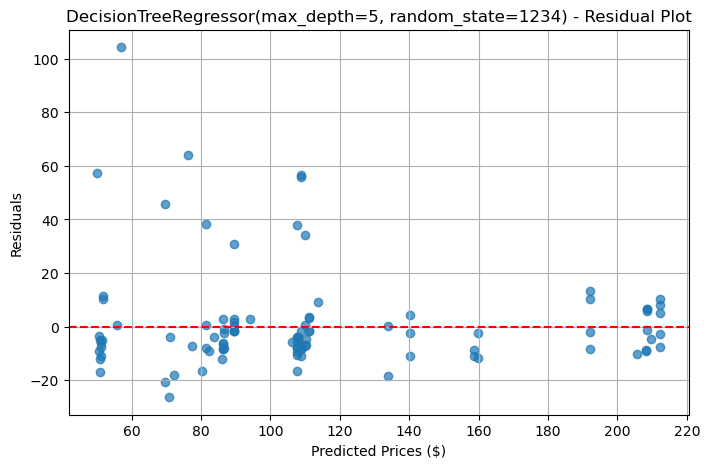

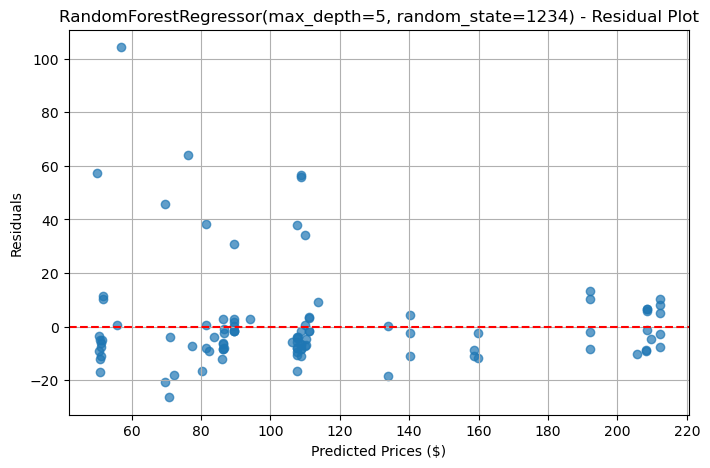

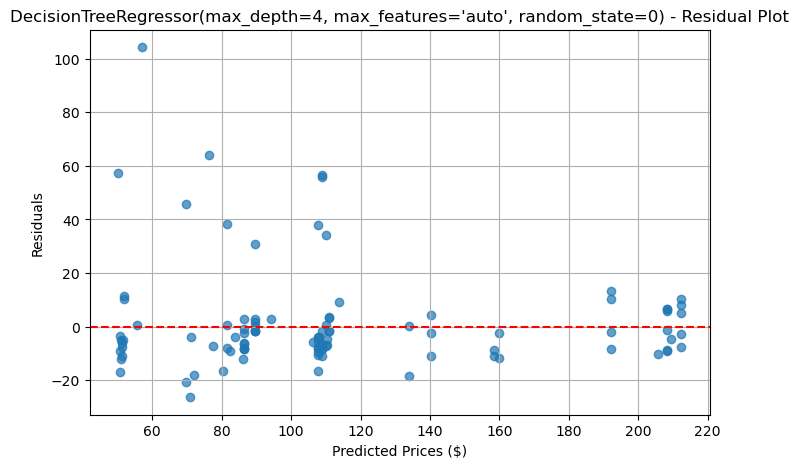

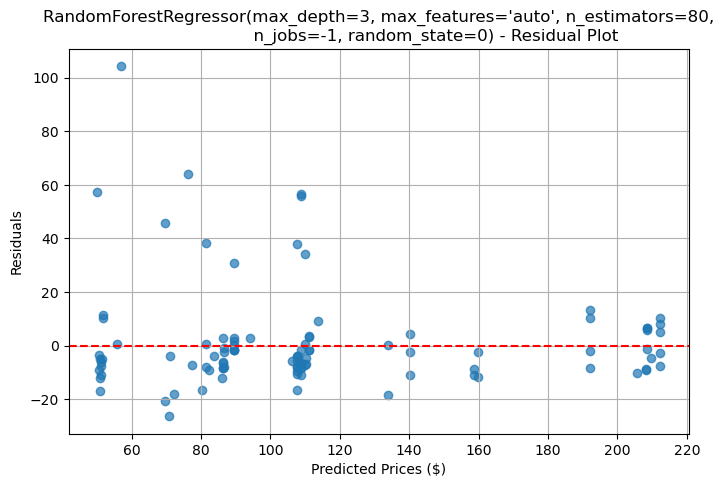

In [346]:

# Function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f"{model_name} - Residual Plot")
    plt.xlabel("Predicted Prices ($)")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()

# Plot residuals for each model
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=5,random_state=1234),
    RandomForestRegressor(n_estimators=100, max_depth=5,random_state=1234),
    DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=0),
    RandomForestRegressor(max_depth=3, max_features='auto', n_estimators=80,
                      n_jobs=-1, random_state=0)
]

for reg in regressors:
    plot_residuals(y_test, y_pred, reg)
    

#### **2. Actual vs Predicted Plot**

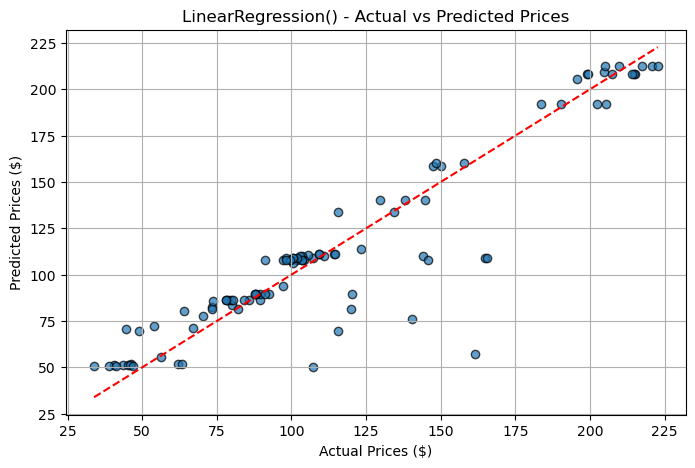

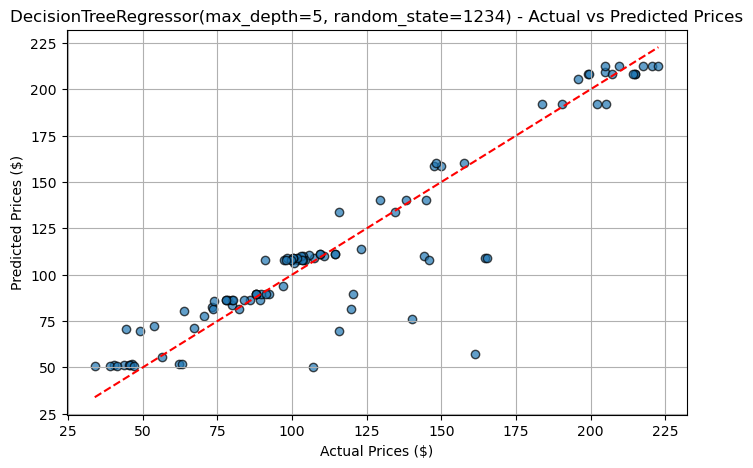

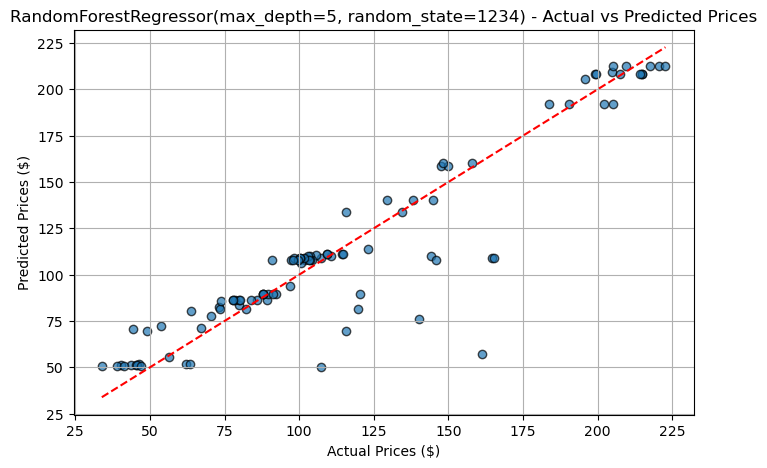

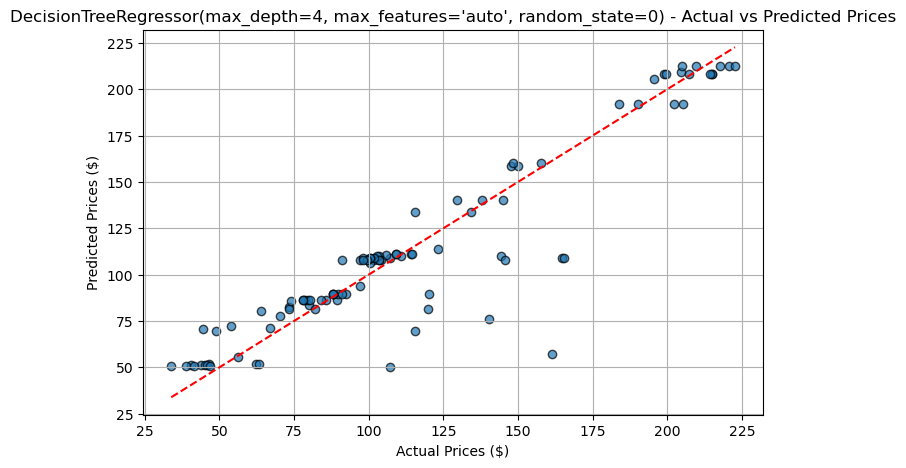

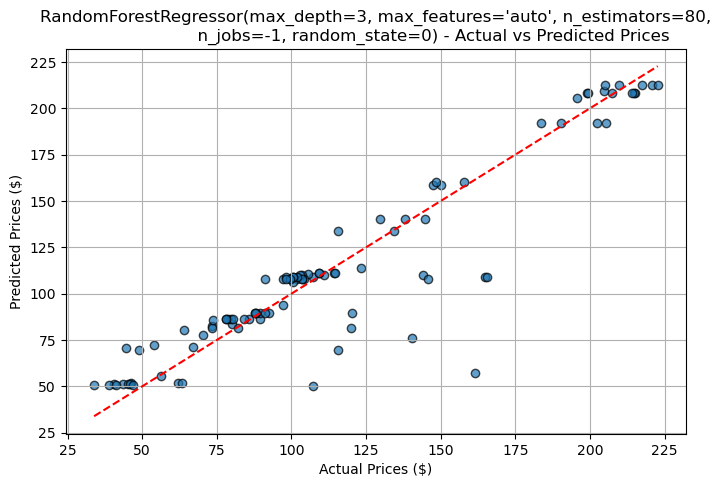

In [347]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{model_name} - Actual vs Predicted Prices")
    plt.xlabel("Actual Prices ($)")
    plt.ylabel("Predicted Prices ($)")
    plt.grid(True)
    plt.show()

# Plot  actual vs predicted for each model
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=5,random_state=1234),
    RandomForestRegressor(n_estimators=100, max_depth=5,random_state=1234),
    DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=0),
    RandomForestRegressor(max_depth=3, max_features='auto', n_estimators=80,
                      n_jobs=-1, random_state=0)
]

for reg in regressors:
    plot_actual_vs_predicted(y_test, y_pred, reg)

#### **3. Error Distribution Plot**

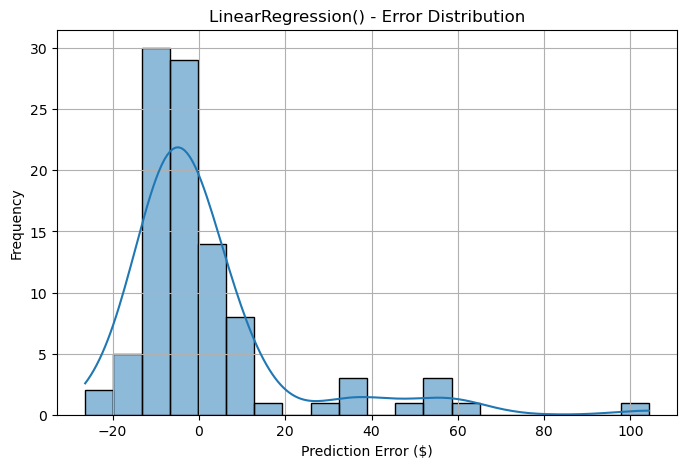

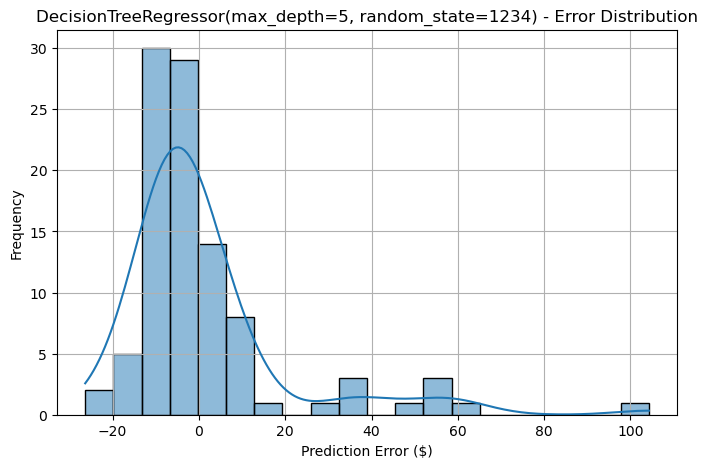

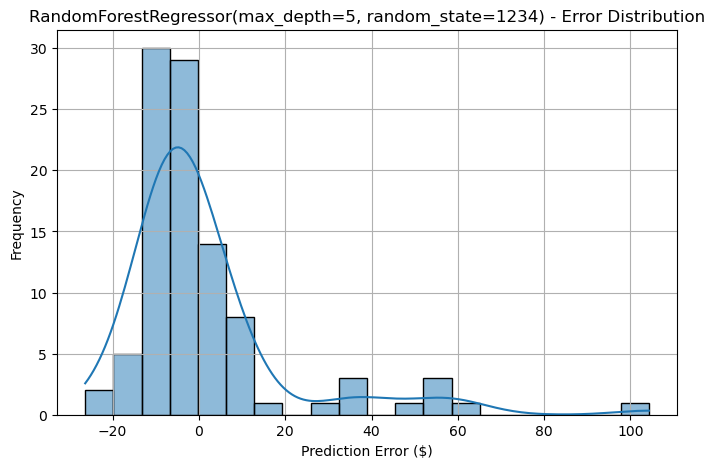

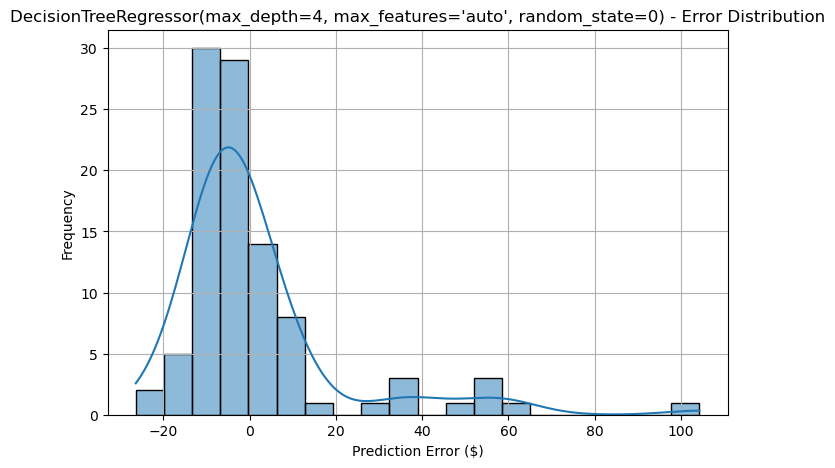

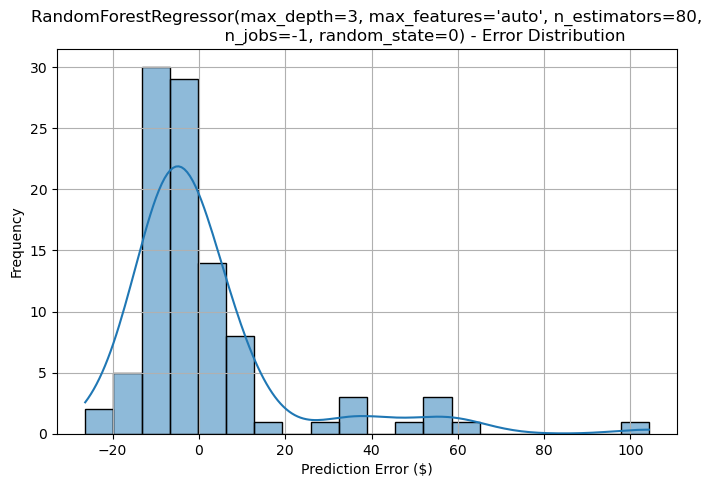

In [348]:

import seaborn as sns

# Function to plot error distribution
def plot_error_distribution(y_test, y_pred, model_name):
    errors = y_test - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(errors, bins=20, kde=True)
    plt.title(f"{model_name} - Error Distribution")
    plt.xlabel("Prediction Error ($)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Plot error distribution for each model
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=5,random_state=1234),
    RandomForestRegressor(n_estimators=100, max_depth=5,random_state=1234),
    DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=0),
    RandomForestRegressor(max_depth=3, max_features='auto', n_estimators=80,
                      n_jobs=-1, random_state=0)
]

for reg in regressors:
    plot_error_distribution(y_test, y_pred, reg)


# Testing model on Evaluation set:

In [ ]:
X_train, X_eval, y_train, y_eval 

In [352]:
best_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, max_features='auto', n_estimators=70,
                      n_jobs=-1, random_state=0)

In [353]:
y_pred_eval = best_model.predict(X_eval)

In [354]:
mae = mean_absolute_error(y_eval, y_pred_eval)
mse = mean_squared_error(y_eval, y_pred_eval)
rmse = np.sqrt(mse)
r2 = r2_score(y_eval, y_pred_eval)
# Calculate Adjusted R2
n = X_eval.shape[0]  # number of samples
p = X_eval.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}\n")
print(f"Adjusted R² Score: {adjusted_r2:.2f}\n")

MAE: 13.04
MSE: 427.38
RMSE: 20.67
R² Score: 0.84

Adjusted R² Score: 0.83



# Model evaluation :

- ## MAE: 13.04
- ## 
MSE: 427.38- ## 
RMSE: 20.6- ## 7
R² Score: 0.- ## 4

Adjusted R² Score:
